# 0. Importamos librerias

In [3]:
#Librerias generales
import pandas as pd 
import numpy as np
import skimpy as sk
import random
from datetime import datetime, timezone, time, timedelta, date
import holidays
from scipy.stats import shapiro
import scipy.stats as stats
import matplotlib.pyplot as plt


#Visualizacion
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
#sns.set_style('whitegrid') 

# Definir la paleta de colores
cmap = sns.color_palette(["#ffb534", "#fbf6ee", "#c1f2b0", "#65b741"])

# 1. Analisis exploratorio de los datos

In [4]:
df= pd.read_csv("/Users/auratorresmedina/Desktop/datos_arreglados.csv",index_col=0, sep=',')

## 1.1 Analisis general

Este analisis no será muy largo, la manipulación de los datos completa esta en el preprocesamiento de los datos.

In [22]:
df.head()

,item,category,department,stores,region,week,year,is_holidays,units_sold,sell_price,total_sales
date,,,,,,,,,,,
2013-07-08,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,28,2013,0,0,12.7414,0.0000
2013-07-15,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,28,2013,1,0,12.7414,0.0000
2013-07-22,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,29,2013,0,4,10.9858,43.9432
2013-07-29,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,30,2013,0,6,10.9858,65.9148
2013-08-05,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,31,2013,0,0,10.9858,0.0000


In [9]:
df.tail()

,date,item,category,department,stores,region,week,year,is_holidays,units_sold,sell_price,total_sales
6610508,2016-03-28,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village(PHI_3),Philadelphia,12,2016,1,22,1.2,26.4
6610509,2016-04-04,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village(PHI_3),Philadelphia,13,2016,0,17,1.2,20.4
6610510,2016-04-11,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village(PHI_3),Philadelphia,14,2016,0,6,1.2,7.2
6610511,2016-04-18,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village(PHI_3),Philadelphia,15,2016,0,0,1.2,0.0
6610512,2016-04-25,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village(PHI_3),Philadelphia,16,2016,0,0,1.2,0.0


In [10]:
df.columns

Index(['date', 'item', 'category', 'department', 'stores', 'region', 'week',
       'year', 'is_holidays', 'units_sold', 'sell_price', 'total_sales'],
      dtype='object')

Los datos nos muestran:


| **Columna** | **Significado**    |
|:-----       | :---               |
|date         |   Fecha de los dias en formato (year-month-day)    |
|item      |    Codigo que identifica el articulo vendido. Se compone de categoria + departamento +codigo articulo       |
|category  |  SUPERMARKET,  HOME_&_GARDEN  y ACCESORIES , las tres categorias distintas que existen  |
|department            |   Por cada categoria anterior hay 3 departamentos     |
|stores        |  Existen las siguientes tiendas: Greenwich_Village, Harlem, Tribeca, Brooklyn, South_End, Roxbury, Back_bay, Midtown_Village, Yorktown y Queen_Village |
|region         |   Pertenecen a las 3 distitnas ciudades, New York, Boston y Philadelphia    |
|week      |    Semana del año      |
|year  |  Año correspondiente |
|is_holidays            |   Si corresponde a un día de fiesta o no             |
|units_sold        |  Numero de ventas efectuada por observación    |
|sell_price        |  Precio de venta de los articulos   |
|total_sales         |   Total de las ventas |


In [11]:
df.dtypes

date            object
item            object
category        object
department      object
stores          object
region          object
week             int64
year             int64
is_holidays      int64
units_sold       int64
sell_price     float64
total_sales    float64
dtype: object

Hemos separados las variables para efectuar los analisis correspondientes

In [5]:
df["date"]= pd.to_datetime(df["date"])
df = df.set_index("date")

In [21]:
#Analisis general de todas las variables, y el rango de fechas
sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 6610513 │ │ string      │ 5     │                                                         │
│ │ Number of columns │ 11      │ │ int64       │ 4     │                                                         │
│ └───────────────────┴─────────┘ │ float64     │ 2     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ week             │    0 │      0 │     26 │     15 │       1 │     12 │     25 │     39 │     52 │ ▇▇▇▆▇▇  │  │
│ │ year             │    0 │      0 │   2000 │    1.5 │    2000 │   2000 │   2000 │   2000 │   2000 │ ▃▅▇▇▇▃  │  │
│ │ is_holidays      │    0 │      0 │   0.25 │   0.44 │       0 │      0 │      0 │      1 │      1 │ ▇    ▃  │  │
│ │ units_sold       │    0 │      0 │    9.9 │     26 │       0 │      1 │      3 │     10 │   4200 │    ▇    │  │
│ │ sell_price       │    0 │      0 │    5.5 │    4.4 │   0.012 │    2.6 │    4.2 │    7.2 │    130 │    ▇    │  │
│ │ total_sales      │    0 │      0 │     35 │     77 │       0 │    1.2 │     15 │     39 │   7500 │    ▇    │  │
│ └──────────────────┴──────┴────────┴────────┴────────┴─────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ item                      │       0 │          0 │                            1 │                  6610513 │  │
│ │ category                  │       0 │          0 │                            1 │                  6610513 │  │
│ │ department                │       0 │          0 │                            1 │                  6610513 │  │
│ │ stores                    │       0 │          0 │                            1 │                  6610513 │  │
│ │ region                    │       0 │          0 │                          1.4 │                  9227055 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [3]:
def crear_grafico_de_barras(df,columna):
    # Obtener value counts y ordenar de mayor a menor
    counts = df[columna].value_counts().sort_values(ascending=False)
    # Tomar solo las 10 primeras opciones
    top10 = counts.head(10)
    
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    top10.plot(kind='bar')
    plt.title(f'Distribucion de {columna}') 
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

In [24]:
df.describe()

,week,year,is_holidays,units_sold,sell_price,total_sales
count,6.610513e+06,6.610513e+06,6.610513e+06,6.610513e+06,6.610513e+06,6.610513e+06
mean,2.582837e+01,2.013544e+03,2.535613e-01,9.883915e+00,5.515011e+00,3.473386e+01
std,1.523091e+01,1.474738e+00,4.350494e-01,2.618403e+01,4.382849e+00,7.664774e+01
min,1.000000e+00,2.011000e+03,0.000000e+00,0.000000e+00,1.200000e-02,0.000000e+00
25%,1.200000e+01,2.012000e+03,0.000000e+00,1.000000e+00,2.620100e+00,1.176000e+00
50%,2.500000e+01,2.014000e+03,0.000000e+00,3.000000e+00,4.200000e+00,1.492500e+01
75%,3.900000e+01,2.015000e+03,1.000000e+00,1.000000e+01,7.176000e+00,3.854340e+01
max,5.200000e+01,2.016000e+03,1.000000e+00,4.220000e+03,1.341500e+02,7.549160e+03


In [25]:
df.isnull().sum()

item           0
category       0
department     0
stores         0
region         0
week           0
year           0
is_holidays    0
units_sold     0
sell_price     0
total_sales    0
dtype: int64

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
week,6610513.0,25.828366,15.230914,1.000,12.0000,25.000,39.0000,52.0000
year,6610513.0,2013.544410,1.474738,2011.000,2012.0000,2014.000,2015.0000,2016.0000
is_holidays,6610513.0,0.253561,0.435049,0.000,0.0000,0.000,1.0000,1.0000
units_sold,6610513.0,9.883915,26.184034,0.000,1.0000,3.000,10.0000,4220.0000
sell_price,6610513.0,5.515011,4.382849,0.012,2.6201,4.200,7.1760,134.1500
total_sales,6610513.0,34.733862,76.647744,0.000,1.1760,14.925,38.5434,7549.1598


A continuación vemos la distribución general de  nuestras variables

Columna: item


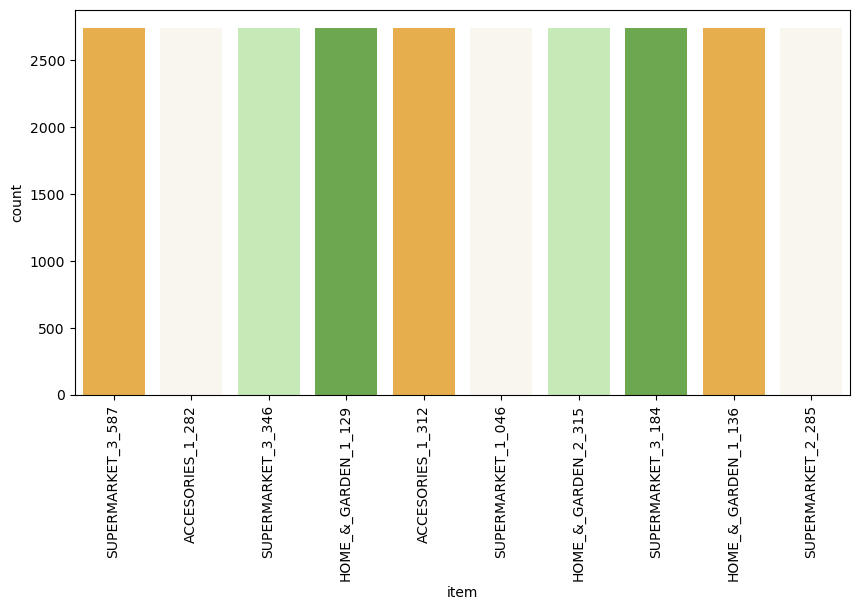

Columna: category


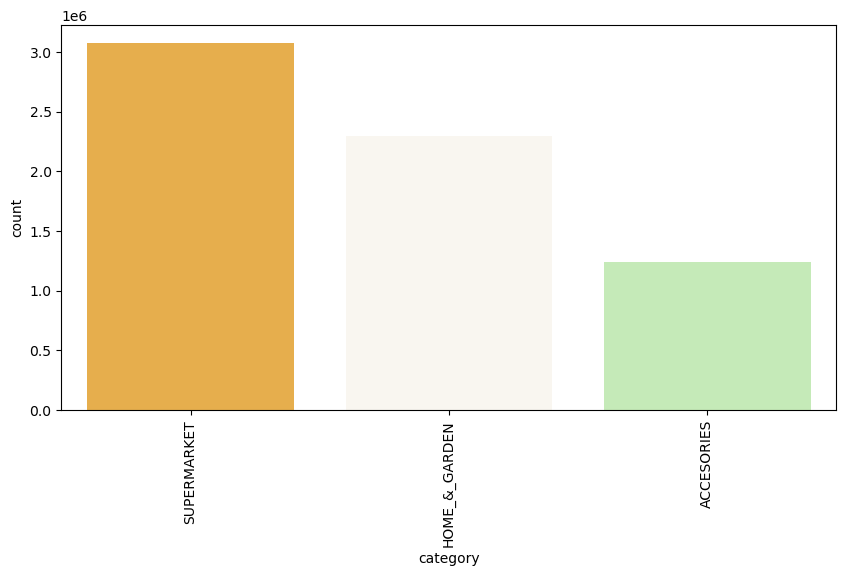

Columna: department


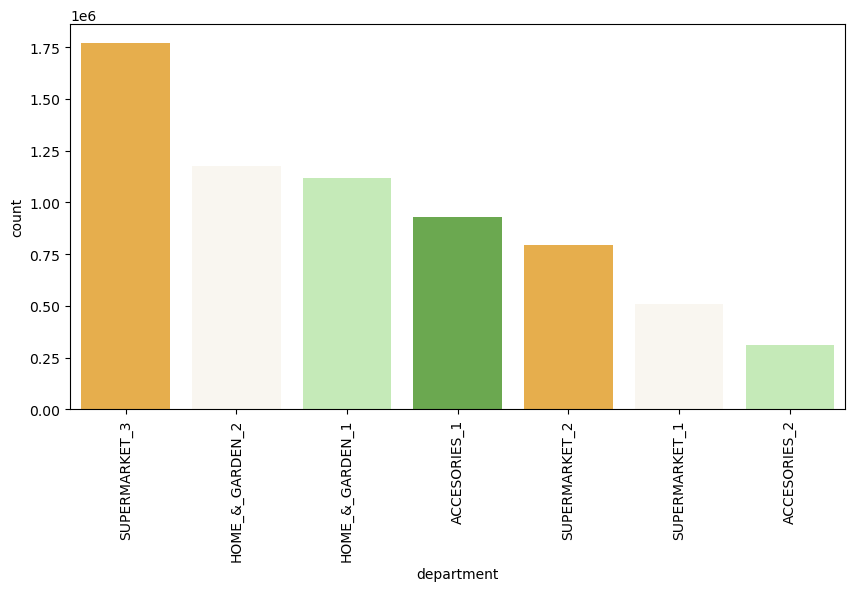

Columna: stores


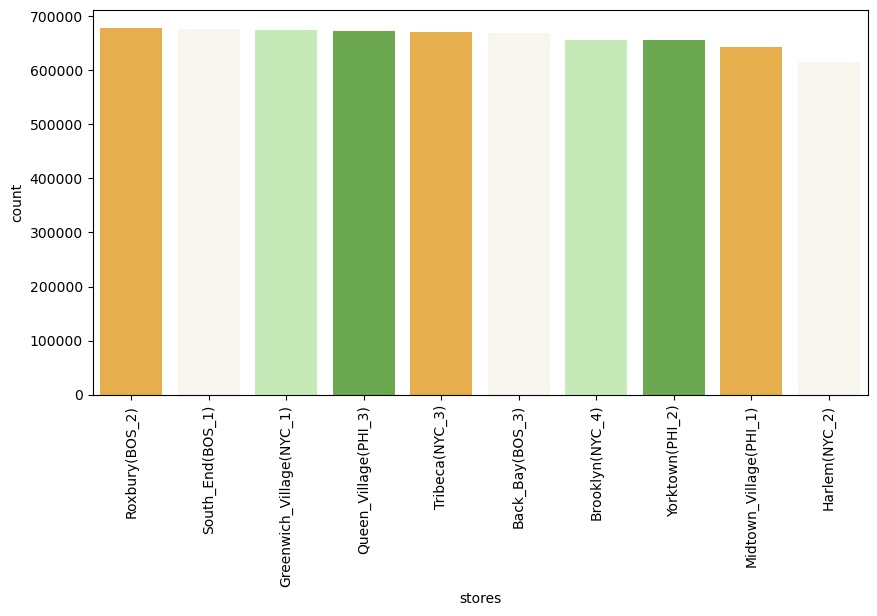

Columna: region


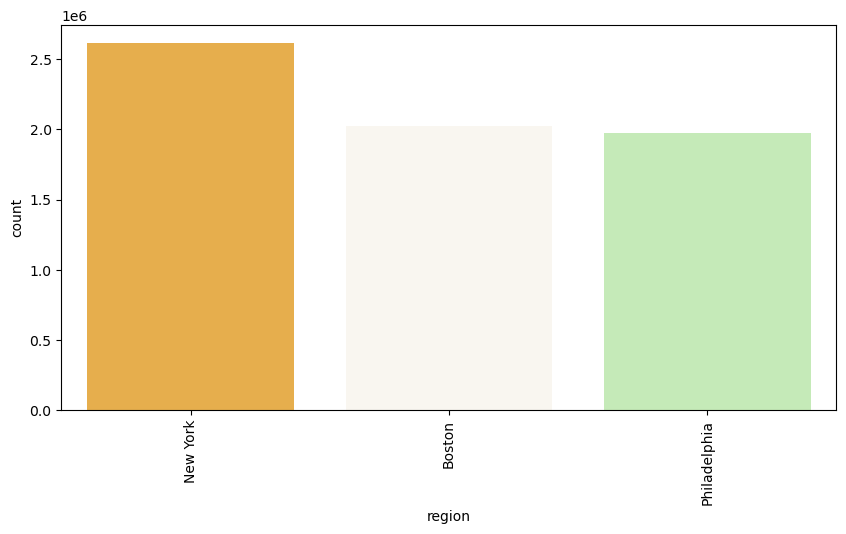

In [9]:
def crear_grafico_de_barras(df, columna, paleta):
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=columna, palette=paleta, order=df[columna].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)  # Girar los nombres en el eje x
    plt.show()

for columna in df.columns:
    if df[columna].dtype == 'object':
        print(f"Columna: {columna}")
        crear_grafico_de_barras(df, columna, cmap)

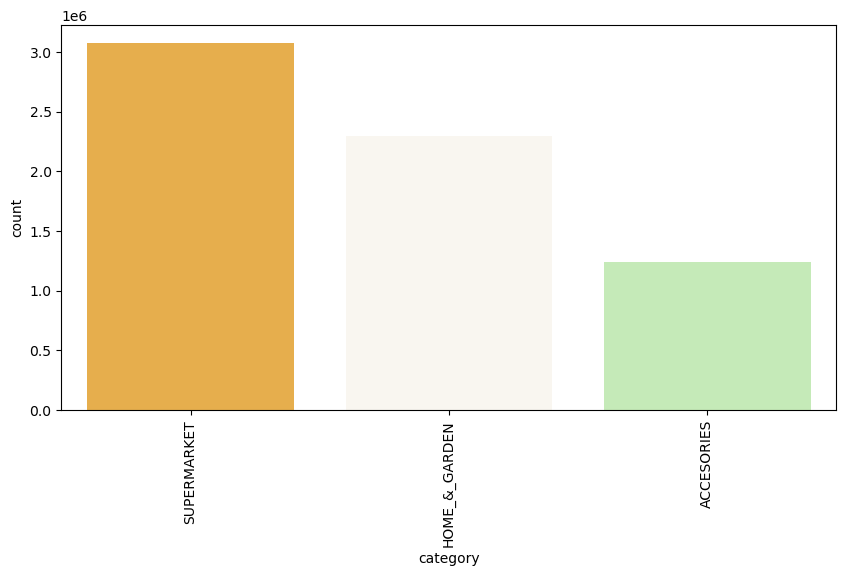

In [10]:
crear_grafico_de_barras(df,'category',cmap)

Después de una vista general de los datos, continuaremos con el analisis exploratotio de las variables.

## 1.2 Analisis exploratorio univariante

Realizaremos el analisis univariante tanto de las variables categoricas como numericas

In [28]:
# Separar las variables numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])
# Separar las variables categóricas
df_categorical = df.select_dtypes(include=['object'])

In [29]:
print("Columnas numéricas:")
for column in df_numeric.columns:
    print(f" - {column}")

print("\nColumnas categóricas:")
for column in df_categorical.columns:
    print(f" - {column}")

Columnas numéricas:
 - week
 - year
 - is_holidays
 - units_sold
 - sell_price
 - total_sales

Columnas categóricas:
 - item
 - category
 - department
 - stores
 - region


Empezaremos con las columnas numéricas, en el orden listado, por lo que la primera variable explorada será Week (la semana)

### Week


In [19]:
total_weeks= df['week'].nunique()
print(f'Hay {total_weeks} de semanas')

Hay 52 de semanas


Unicas, que corresponden a las semanas de un año

In [ ]:
# Agrupa los datos por semana y suma los valores
df_semanal = df.resample('W').sum()

# Ahora puedes calcular la suma de todas las semanas
total_semanas = df_semanal['week'].sum()
print(f'La suma de todas las semanas es {total_semanas}')

### Year

In [13]:
df['year'].describe()

count    6.610513e+06
mean     2.013544e+03
std      1.474738e+00
min      2.011000e+03
25%      2.012000e+03
50%      2.014000e+03
75%      2.015000e+03
max      2.016000e+03
Name: year, dtype: float64

In [11]:
total_years= df['year'].nunique()
print(f'Hay un total de {total_years} años')

Hay un total de 6 años


### Holidays

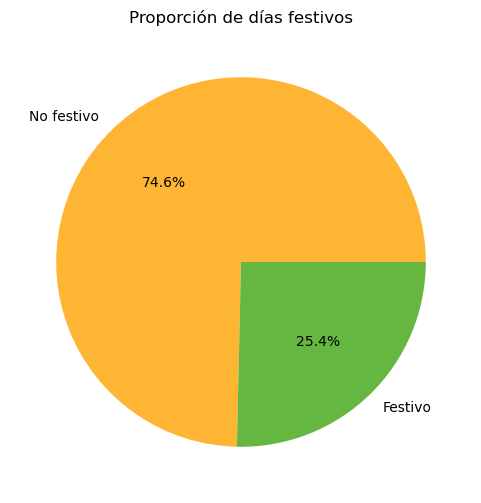

In [32]:
holiday_counts = df['is_holidays'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(holiday_counts, labels=['No festivo', 'Festivo'], autopct='%1.1f%%', colors=["#ffb534", "#65b741"])
plt.title('Proporción de días festivos')
plt.show()


Tenemos una cantidad bastante elevada de días festivos


In [11]:
holiday_freq = df['is_holidays'].value_counts()

print(holiday_freq)

is_holidays
0    4934343
1    1676170
Name: count, dtype: int64


No vemos nada relevante

### Units sold

In [18]:
# Revisamos de nuevo
df['units_sold'].describe()

count    6.610513e+06
mean     9.883915e+00
std      2.618403e+01
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      1.000000e+01
max      4.220000e+03
Name: units_sold, dtype: float64

<Axes: >

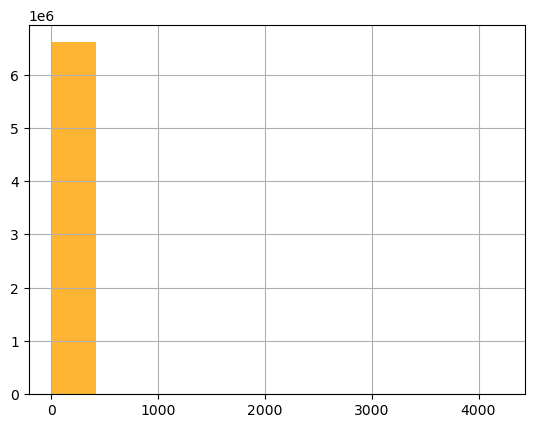

In [36]:
df['units_sold'].hist(color="#ffb534")  

Parece que la escala es demasiado grande

<Axes: >

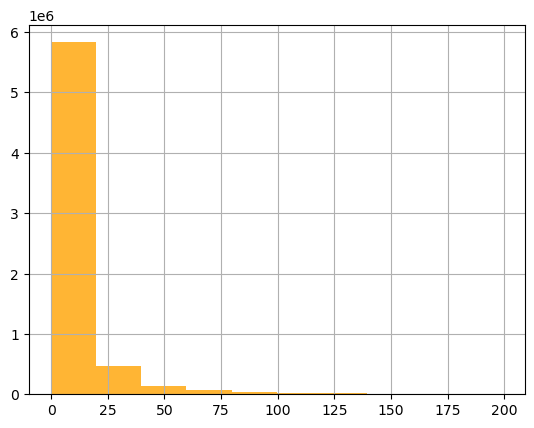

In [23]:
df[df['units_sold'] < 200]['units_sold'].hist(color="#ffb534")

Parece que las unidades vendidas no cambian mucho

### Sell price

In [97]:
max_price = df['sell_price'].max()
min_price = df['sell_price'].min()

print(f'El precio de venta máximo es: {max_price}')
print(f'El precio de venta mínimo es: {min_price}')

El precio de venta máximo es: 134.14999999999998
El precio de venta mínimo es: 0.012


In [98]:
unique_prices = df['sell_price'].unique()

print(f'Los precios de venta únicos son: {unique_prices}')

Los precios de venta únicos son: [12.7414 10.9858  6.65   ...  0.684   0.072   4.308 ]


In [99]:
num_unique_prices = df['sell_price'].nunique()

print(f'Hay {num_unique_prices} precios de venta únicos.')

Hay 1855 precios de venta únicos.


Es un gran abanico de precios

<Axes: >

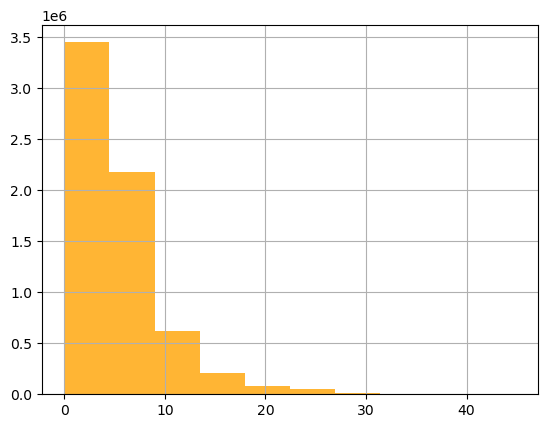

In [22]:
df[df['sell_price'] < 50]['sell_price'].hist(color="#ffb534")

<Axes: >

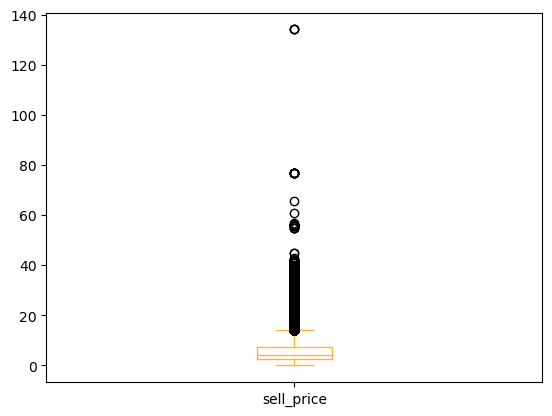

In [26]:
df['sell_price'].plot(kind='box', color="#ffb534")

In [10]:
df_sorted = df.sort_values('sell_price')

cheapest_10 = df_sorted.head(10)
most_expensive_10 = df_sorted.tail(10)


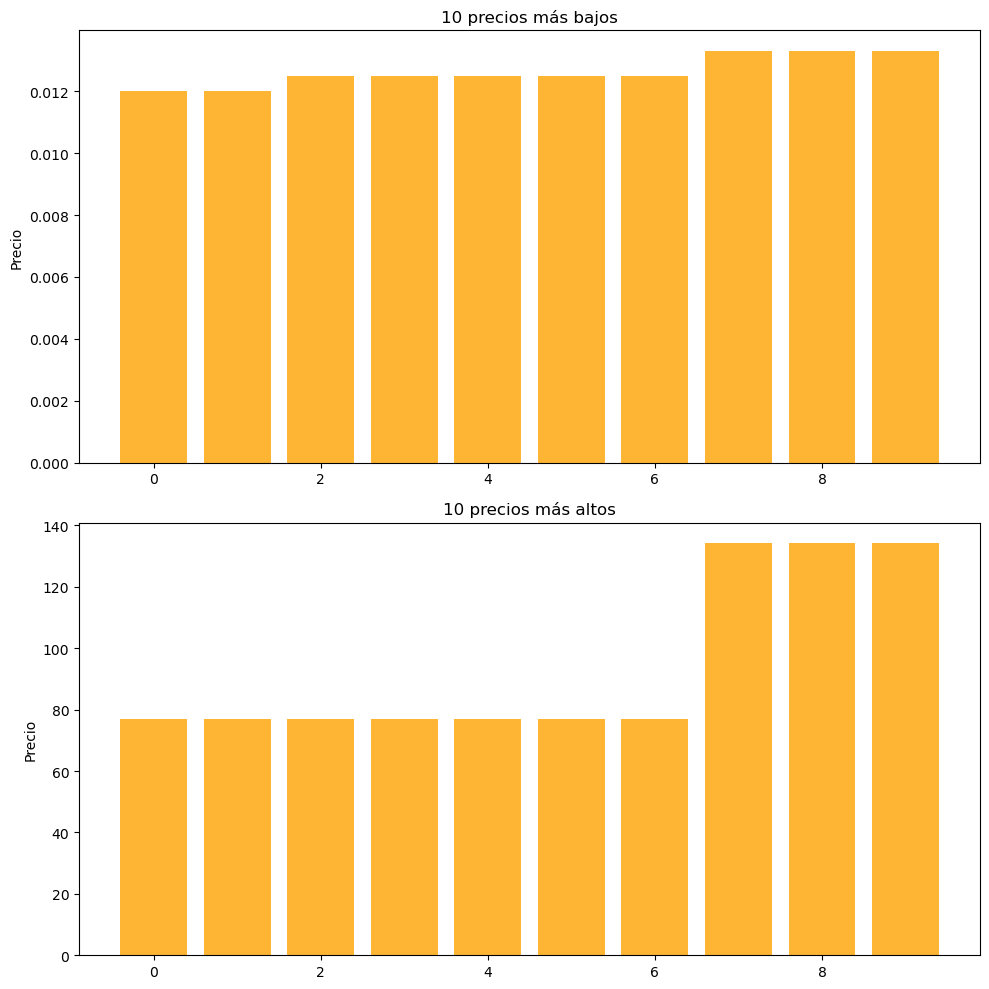

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), )

ax[0].bar(range(10), cheapest_10['sell_price'], color='#ffb534')  # Asume que 'sell_price' es el nombre de la columna de precios
ax[0].set_title('10 precios más bajos')
ax[0].set_ylabel('Precio')

ax[1].bar(range(10), most_expensive_10['sell_price'], color='#ffb534')  # Asume que 'sell_price' es el nombre de la columna de precios
ax[1].set_title('10 precios más altos')
ax[1].set_ylabel('Precio')

plt.tight_layout()
plt.show()

### Item

In [63]:
item_counts = df['item'].value_counts()
print(item_counts)

item
SUPERMARKET_3_587      2740
ACCESORIES_1_282       2740
SUPERMARKET_3_346      2740
HOME_&_GARDEN_1_129    2740
ACCESORIES_1_312       2740
                       ... 
HOME_&_GARDEN_1_308     571
HOME_&_GARDEN_1_159     553
HOME_&_GARDEN_1_242     530
SUPERMARKET_3_296       517
SUPERMARKET_2_379       460
Name: count, Length: 3049, dtype: int64


In [64]:
num_unique_items = df['item'].nunique()
print(f'Hay {num_unique_items} ítems diferentes.')

Hay 3049 ítems diferentes.


/var/folders/0v/hckyh79x76xbj22znr49dsv80000gn/T/ipykernel_5852/3085120444.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(top_10.index, rotation=45, horizontalalignment='right')
/var/folders/0v/hckyh79x76xbj22znr49dsv80000gn/T/ipykernel_5852/3085120444.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(less_10.index, rotation=45, horizontalalignment='right')


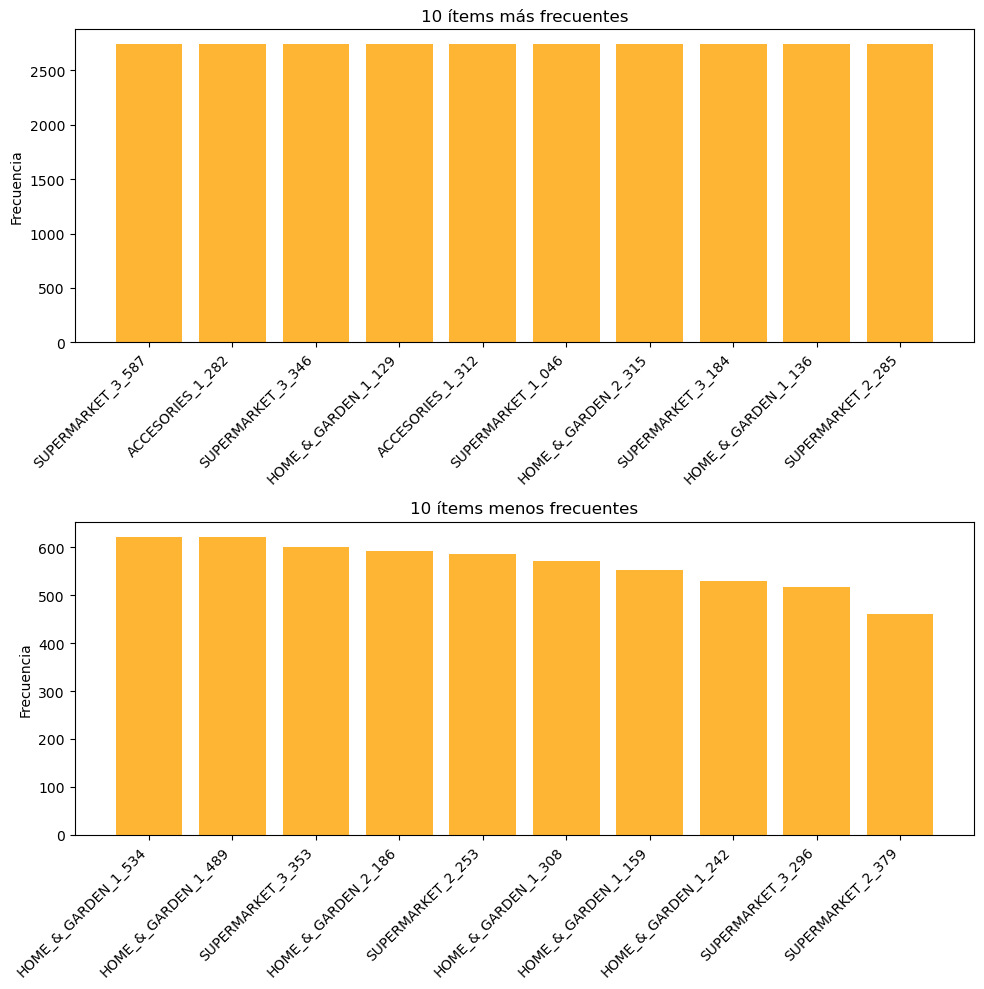

In [16]:
item_counts = df['item'].value_counts()

top_10 = item_counts.head(10)
less_10 = item_counts.tail(10)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].bar(top_10.index, top_10,  color='#ffb534')
ax[0].set_title('10 ítems más frecuentes')
ax[0].set_ylabel('Frecuencia')
ax[0].set_xticklabels(top_10.index, rotation=45, horizontalalignment='right')

ax[1].bar(less_10.index, less_10,  color='#ffb534')
ax[1].set_title('10 ítems menos frecuentes')
ax[1].set_ylabel('Frecuencia')
ax[1].set_xticklabels(less_10.index, rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

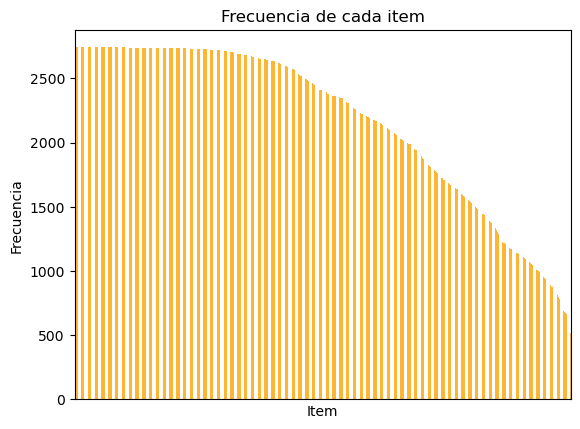

In [17]:
df['item'].value_counts().plot(kind='bar', color='#ffb534')
plt.xlabel('Item')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cada item')
plt.xticks([])  # Configura las etiquetas del eje x a una lista vacía
plt.show()

### Category

In [77]:
freq_distribution = df['category'].value_counts()
print("Distribución de frecuencia de 'category':\n", freq_distribution)

Distribución de frecuencia de 'category':
 category
SUPERMARKET      3073307
HOME_&_GARDEN    2295918
ACCESORIES       1241288
Name: count, dtype: int64


Text(0, 0.5, 'Frecuencia')

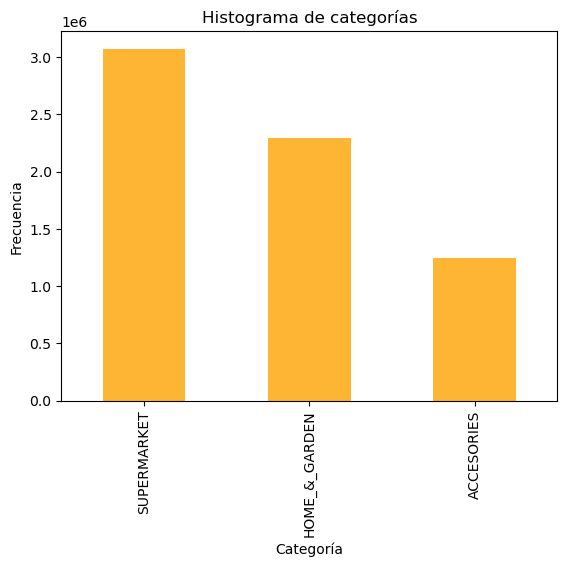

In [6]:
df['category'].value_counts().plot(kind='bar', color= "#ffb534")

plt.title('Histograma de categorías')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

Vemos una clara preferencia de la categoria supermarket

### Department

In [81]:
freq_distribution = df['department'].value_counts()
print("Distribución de frecuencia de 'department':\n", freq_distribution)

Distribución de frecuencia de 'department':
 department
SUPERMARKET_3      1773017
HOME_&_GARDEN_2    1175615
HOME_&_GARDEN_1    1120303
ACCESORIES_1        928899
SUPERMARKET_2       793587
SUPERMARKET_1       506703
ACCESORIES_2        312389
Name: count, dtype: int64


Text(0, 0.5, 'Frecuencia')

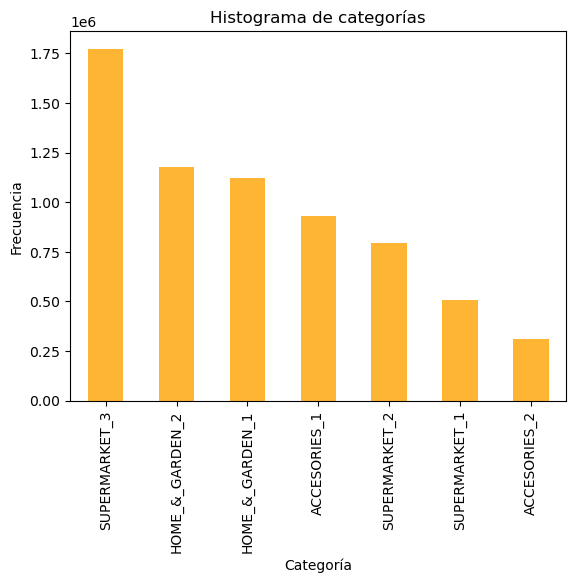

In [14]:
df['department'].value_counts().plot(kind='bar', color = "#ffb534")

plt.title('Histograma de categorías')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

### Stores

In [100]:
num_unique_stores = df['stores'].nunique()

print(f'Hay {num_unique_stores} tiendas únicas.')

Hay 10 tiendas únicas.


In [85]:
freq_distribution = df['stores'].value_counts()
print("Distribución de frecuencia de 'category':\n", freq_distribution)

Distribución de frecuencia de 'category':
 stores
Roxbury(BOS_2)              678037
South_End(BOS_1)            676632
Greenwich_Village(NYC_1)    675255
Queen_Village(PHI_3)        672947
Tribeca(NYC_3)              670857
Back_Bay(BOS_3)             667996
Brooklyn(NYC_4)             655964
Yorktown(PHI_2)             655279
Midtown_Village(PHI_1)      643080
Harlem(NYC_2)               614466
Name: count, dtype: int64


Text(0, 0.5, 'Frecuencia')

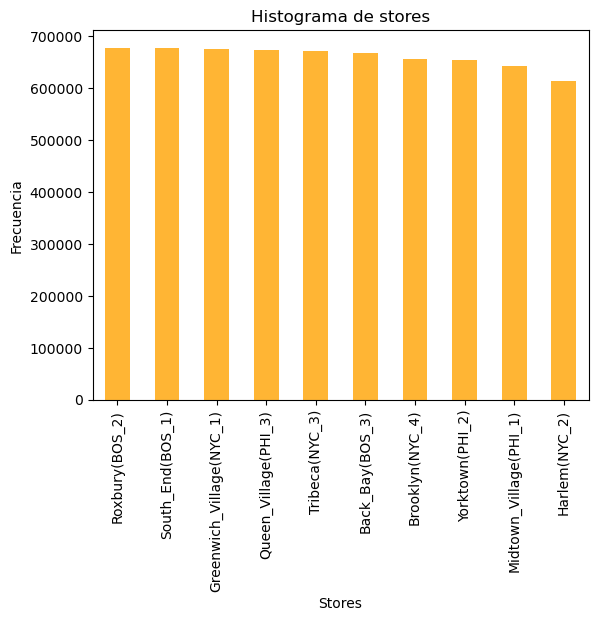

In [17]:
df['stores'].value_counts().plot(kind='bar', color= "#ffb534")

plt.title('Histograma de stores')
plt.xlabel('Stores')
plt.ylabel('Frecuencia')

### Region

In [26]:
estados = df['region'].unique()
for estado in estados:
    print(estado)

Boston
New York
Philadelphia


In [27]:
frecuencia_estados = df['region'].value_counts()
print(frecuencia_estados)

region
New York        2616542
Boston          2022665
Philadelphia    1971306
Name: count, dtype: int64


In [28]:
region_mas_comun = df['region'].mode()[0]
print(f'La región más común es {region_mas_comun}')

La región más común es New York


## 1.3 Analisis exploratorio bivariante

Lo primero que realizamos es un mapa de correlación

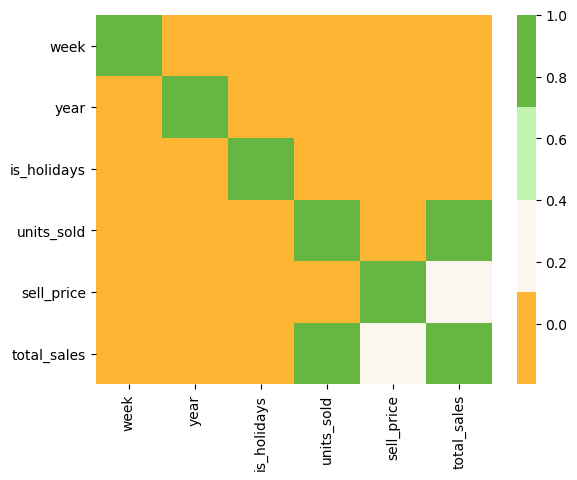

In [42]:
df_numerico = df.select_dtypes(include=[np.number])

corr = df_numerico.corr()
sns.heatmap(corr, cmap=cmap)
plt.show()

No vemos ninguna relación importante, excepto units_sold con total_sales. Relación con sentido ya que la cantidad con el total de la vente esta relacionado, aunque poco valor informativo arroja este mapa.

### Total sales

#### Week

Queremos comprobar la relación de algunas variables con las ventas totales, empezaremos con la variable week.

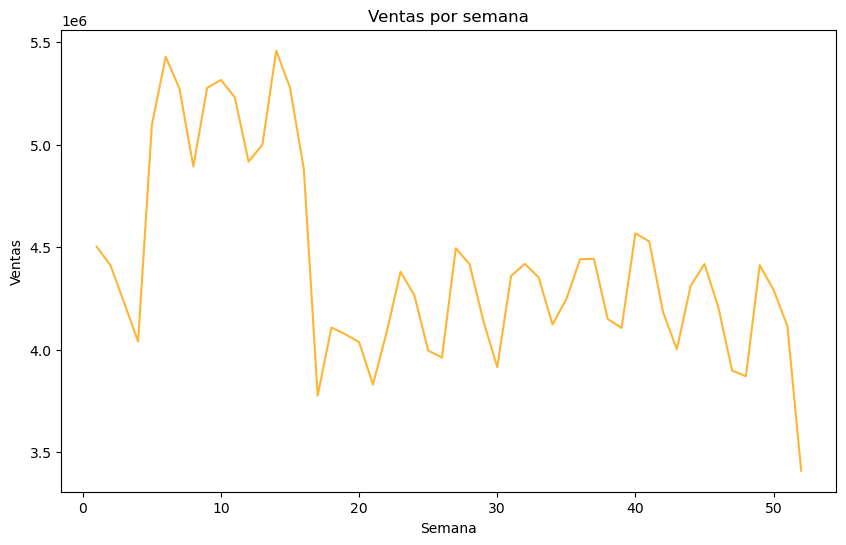

In [39]:
week_sales= df.groupby('week')['total_sales'].sum()
plt.figure(figsize=(10,6),)
plt.plot(week_sales.index, week_sales.values ,color="#ffb534")  # Cambiar el color de la línea
plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.title('Ventas por semana')
plt.show()

Vemos que el inicio del año, tiene más ventas que el resto del año, revisamos las semanas que más ventas tiene

In [43]:
top_week_sales = week_sales.nlargest(15)
print(top_week_sales)

week
14    5.458961e+06
6     5.429849e+06
10    5.316178e+06
15    5.278428e+06
9     5.277710e+06
7     5.273897e+06
11    5.232282e+06
5     5.096755e+06
13    5.000255e+06
12    4.917894e+06
8     4.893679e+06
16    4.881399e+06
40    4.568574e+06
41    4.528890e+06
1     4.503511e+06
Name: total_sales, dtype: float64


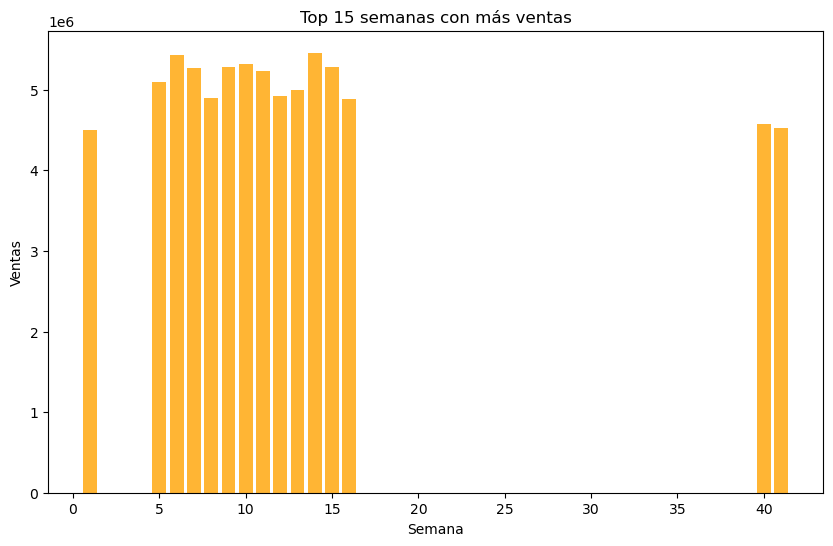

In [44]:
plt.figure(figsize=(10,6))
plt.bar(top_week_sales.index, top_week_sales.values, color="#ffb534")
plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.title('Top 15 semanas con más ventas')
plt.show()

Aquellas semanas con más ventas corresponden a los meses de febrero y marzo.

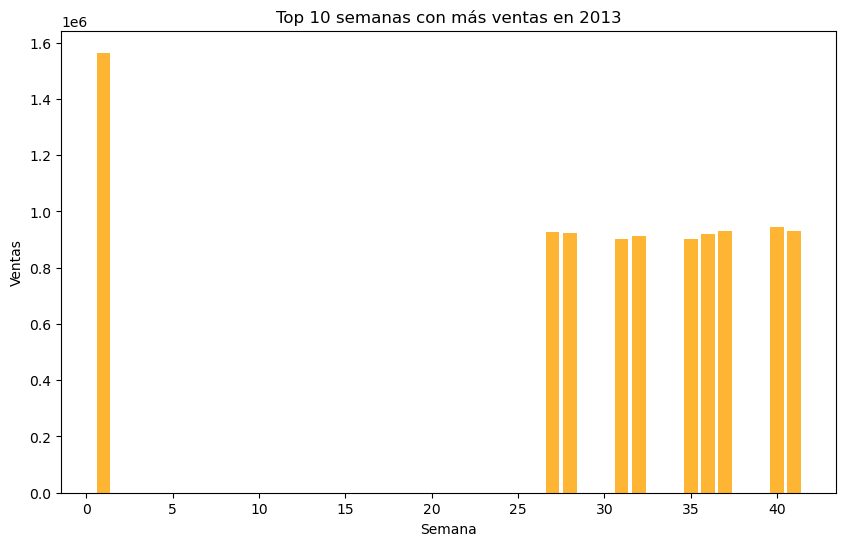

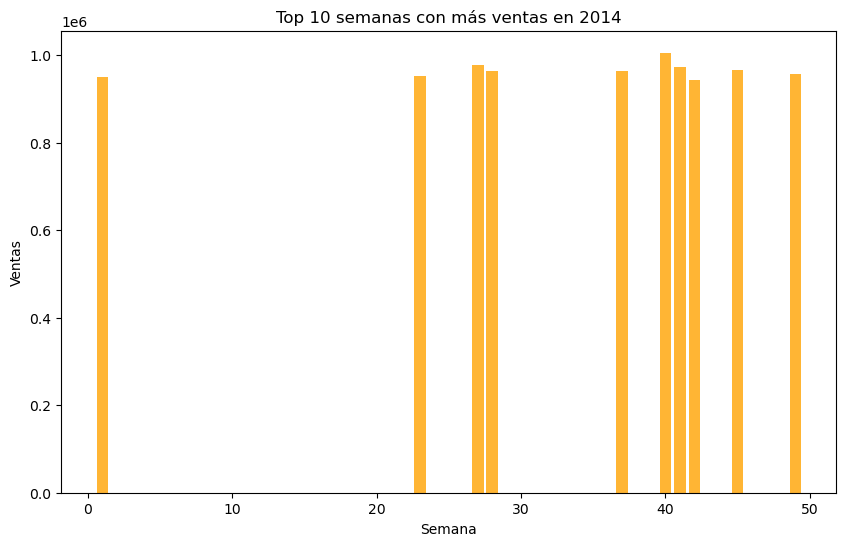

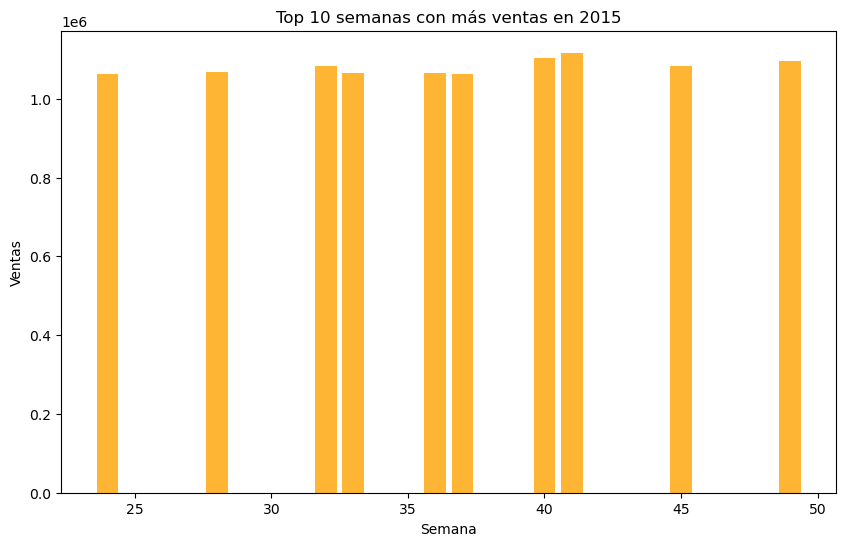

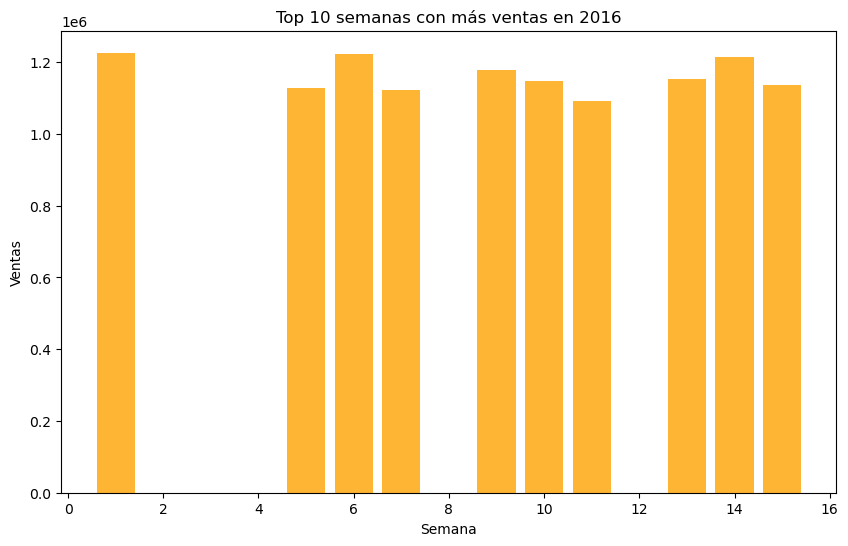

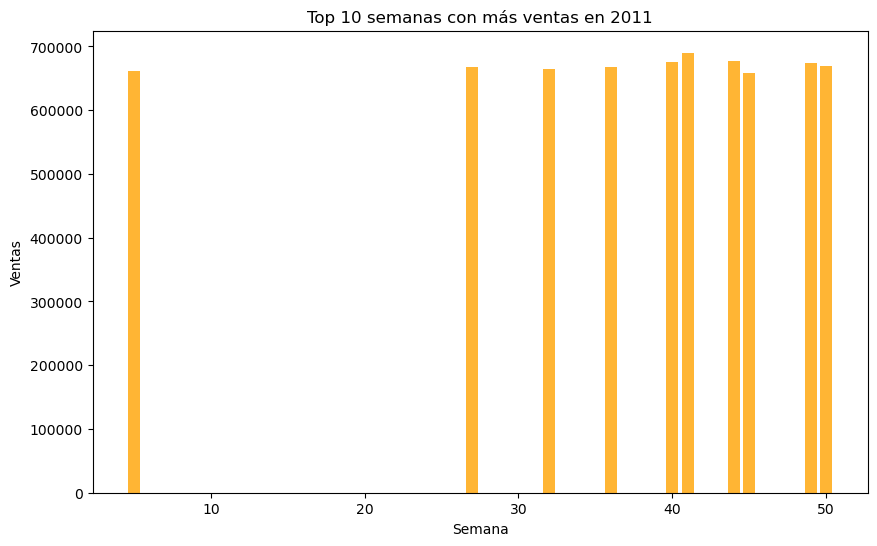

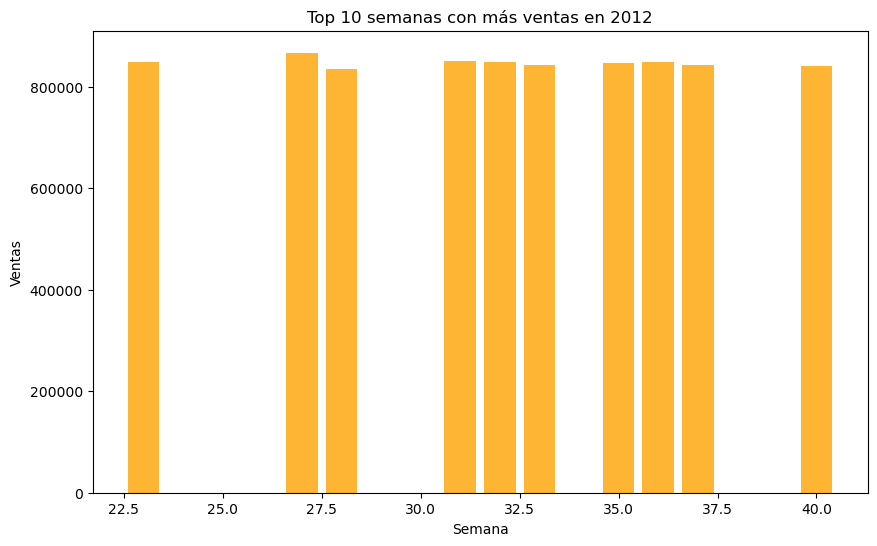

In [45]:
years = df['year'].unique()

for year in years:
    df_year = df[df['year'] == year]
    sales_per_week = df_year.groupby('week')['total_sales'].sum()
    top_sales_per_week = sales_per_week.nlargest(10)

    plt.figure(figsize=(10,6))
    plt.bar(top_sales_per_week.index, top_sales_per_week.values, color="#ffb534")
    plt.xlabel('Semana')
    plt.ylabel('Ventas')
    plt.title(f'Top 10 semanas con más ventas en {year}')
    plt.show()

Vemos que si separamos por años se diversifican las semanas con más ventas. No se concentra en el primer q del año.

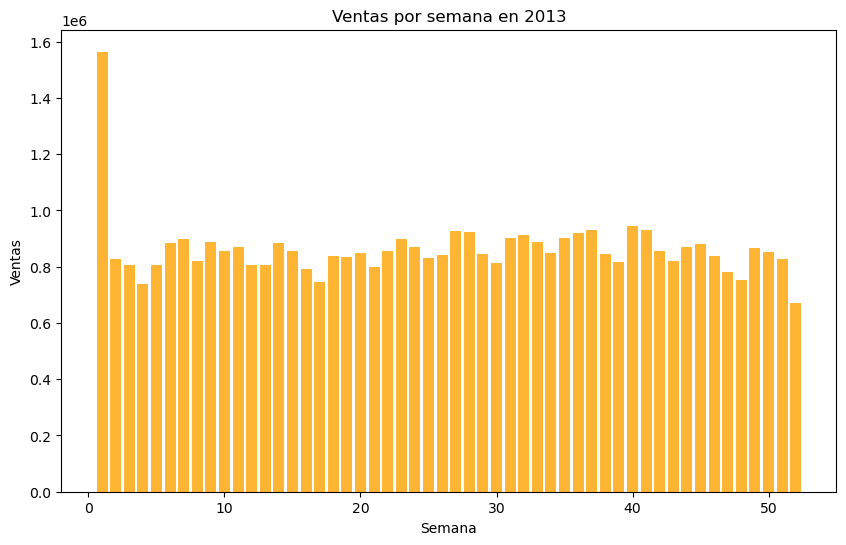

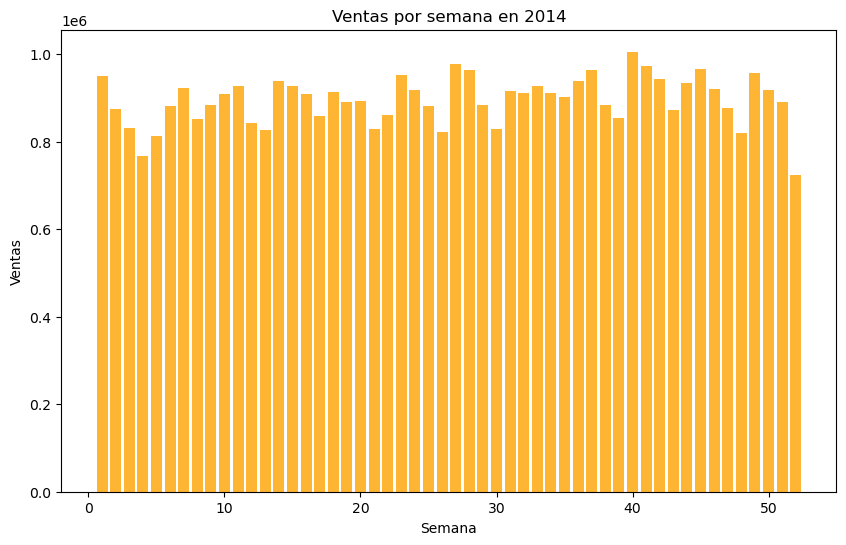

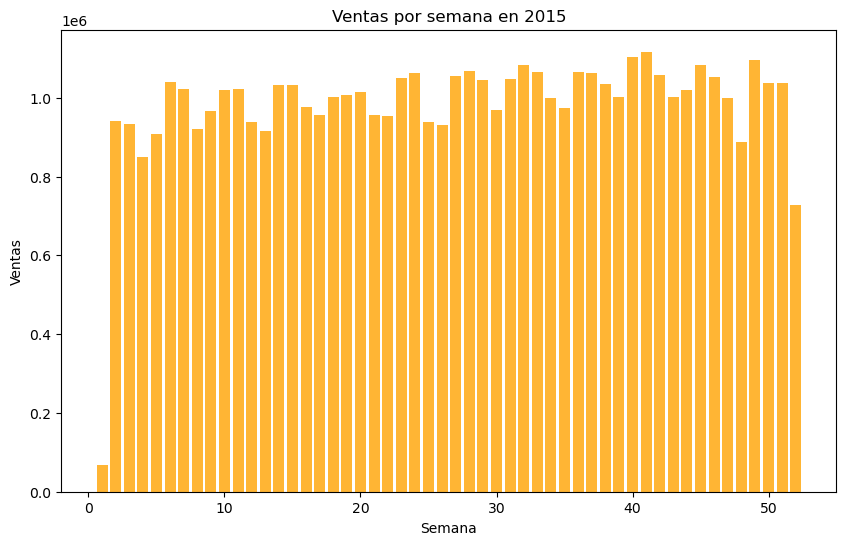

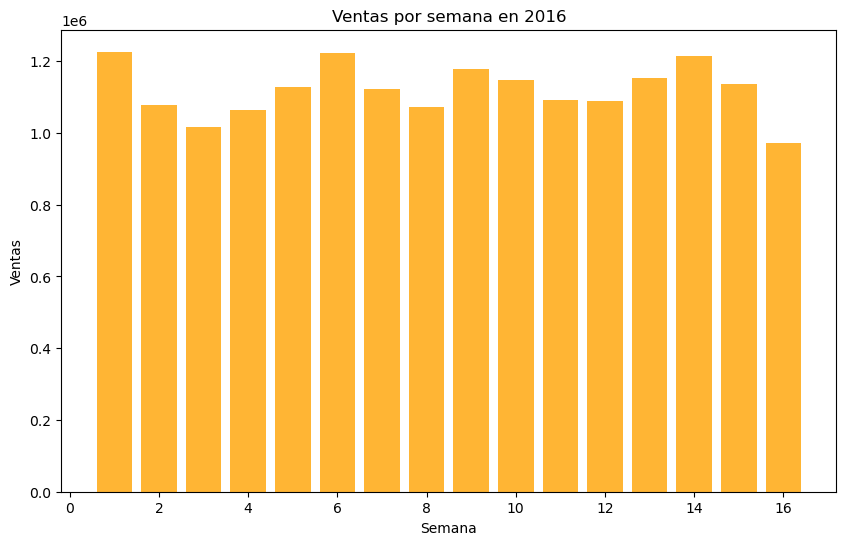

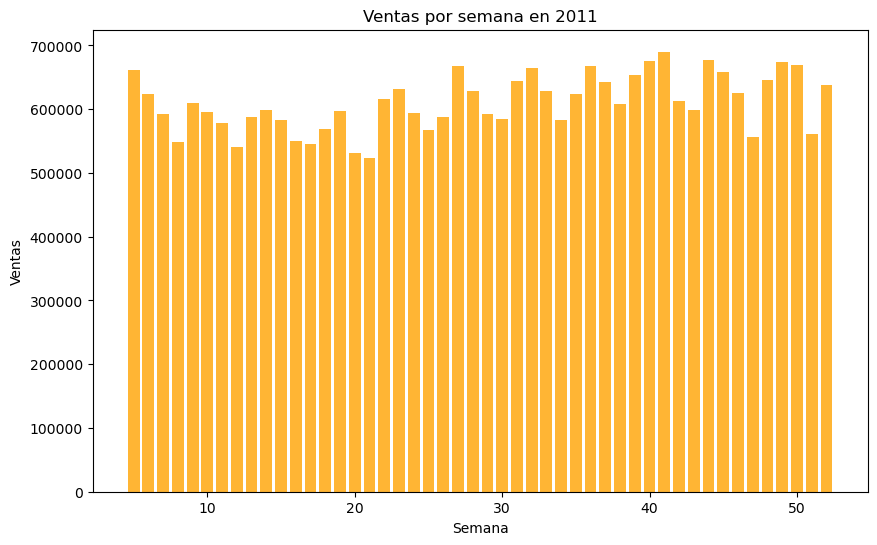

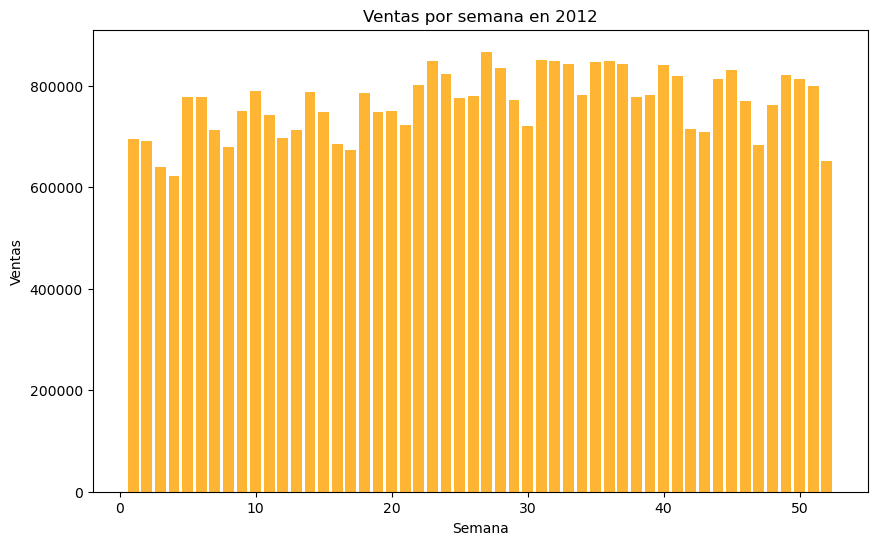

In [46]:
years = df['year'].unique()

for year in years:
    df_year = df[df['year'] == year]
    sales_per_week = df_year.groupby('week')['total_sales'].sum()

    plt.figure(figsize=(10,6))
    plt.bar(sales_per_week.index, sales_per_week.values, color="#ffb534")
    plt.xlabel('Semana')
    plt.ylabel('Ventas')
    plt.title(f'Ventas por semana en {year}')
    plt.show()

Tal y como vemos al desplegarlo por años, el q1 no es el más abundante, solo que el año 2016 solo tiene datos de este q por lo que modifica los totales.
Veremos el ranking de semanas con más ventas sin tener en cuenta el año 2016.

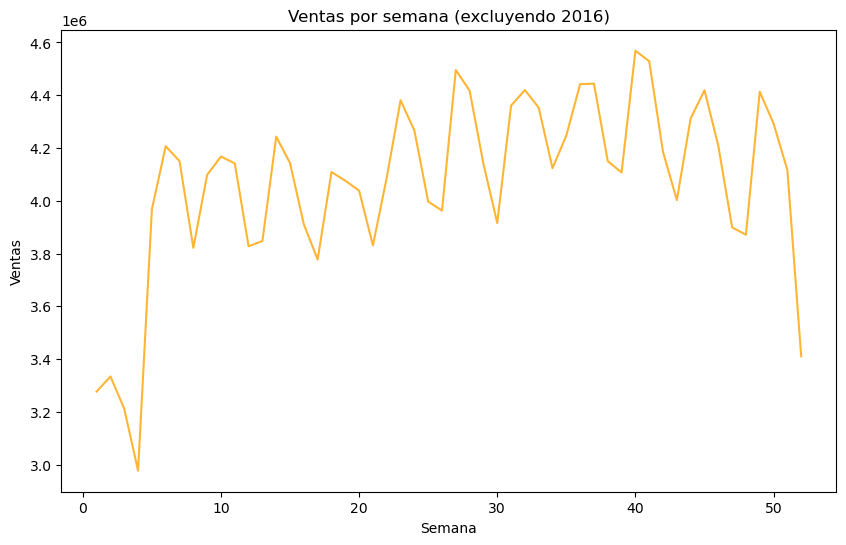

In [47]:
df_filtered = df[df['year'] != 2016]

week_sales = df_filtered.groupby('week')['total_sales'].sum()
plt.figure(figsize=(10,6))
plt.plot(week_sales.index, week_sales.values, color="#ffb534")
plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.title('Ventas por semana (excluyendo 2016)')
plt.show()

Hay más prevalencia en el último que en el primero.

A continuación vremos la variable año junto a las ventas totales.

#### Year

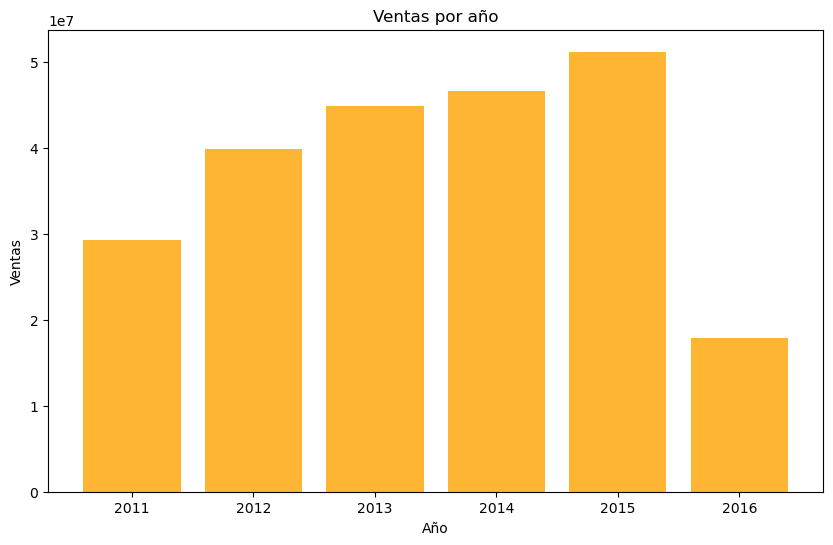

In [48]:
year_sales= df.groupby('year')['total_sales'].sum()
plt.figure(figsize=(10,6))
plt.bar(year_sales.index, year_sales.values, color="#ffb534")
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Ventas por año')
plt.show()

Tenemos datos del 2011 al 2016, este ultimo no acabado por lo que serían datos del año actual.

In [49]:
years = df.index.year.unique()

for year in years:
    df_year = df[df.index.year == year]
    sales_per_year = df_year['total_sales'].sum()
    print(f'Ventas en {year}: {sales_per_year}')

Ventas en 2013: 44091499.958299994
Ventas en 2014: 46429053.42759997
Ventas en 2015: 51994110.4217
Ventas en 2016: 17919419.132999998
Ventas en 2011: 28671346.412899997
Ventas en 2012: 40503219.58110001


Vemos la distribución de los años por su Q

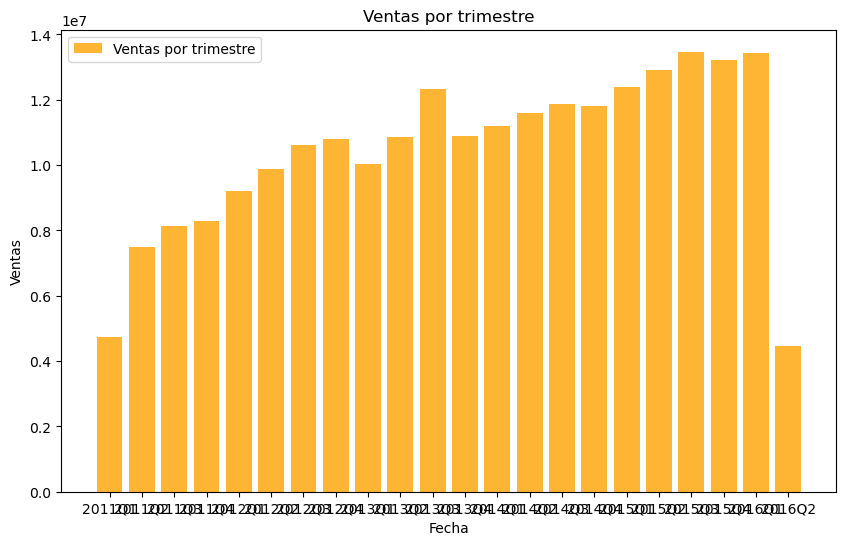

In [50]:
quarter_sales = df.resample('Q')['total_sales'].sum()
quarter_sales.index = quarter_sales.index.to_period('Q')

plt.figure(figsize=(10,6))
plt.bar(quarter_sales.index.astype(str), quarter_sales.values, label='Ventas por trimestre', color="#ffb534")

plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas por trimestre')
plt.legend()
plt.show()

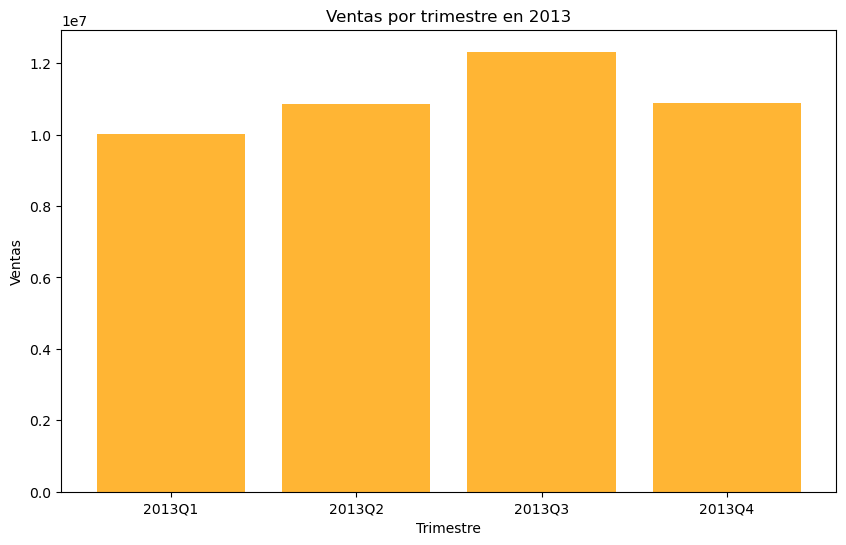

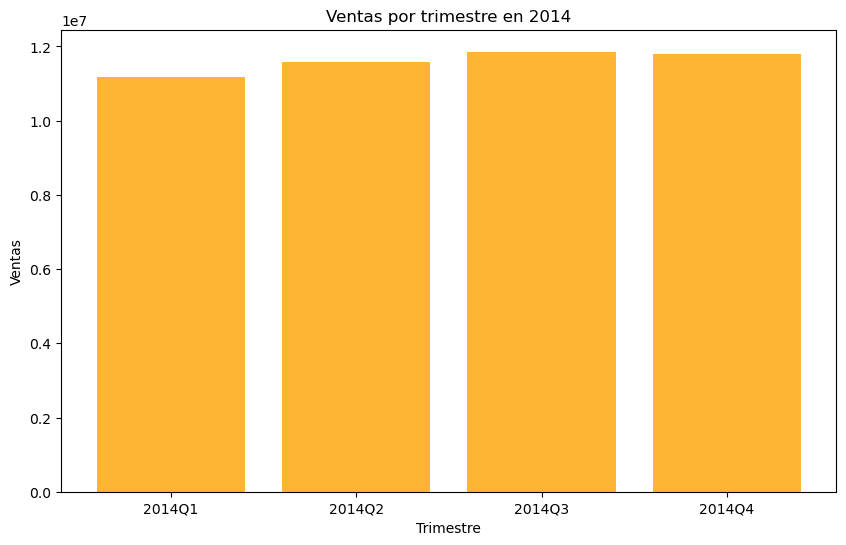

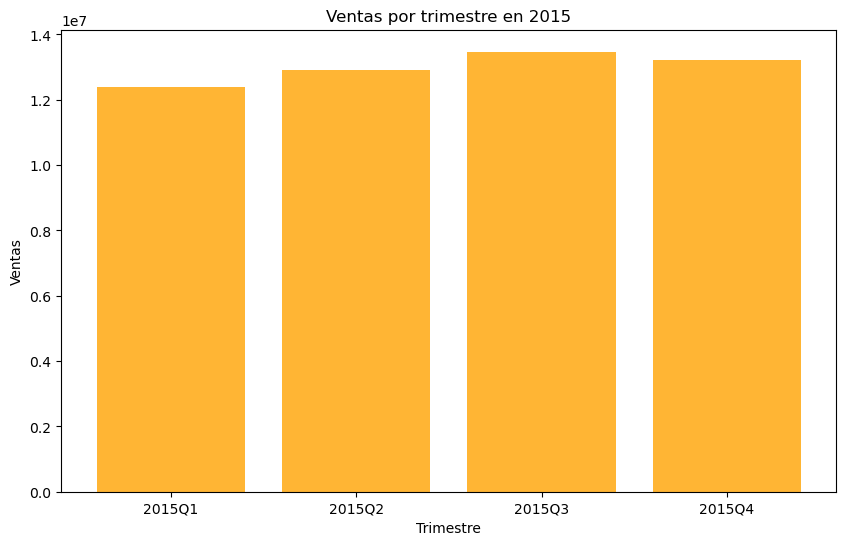

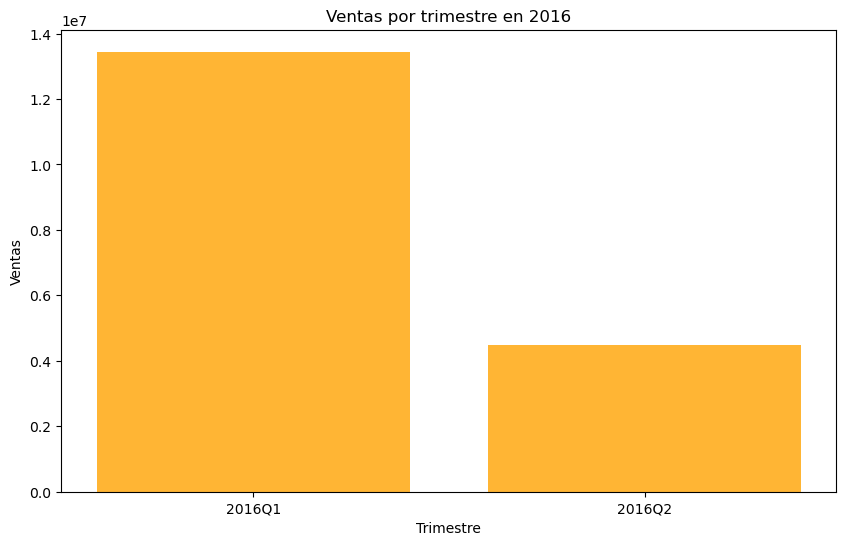

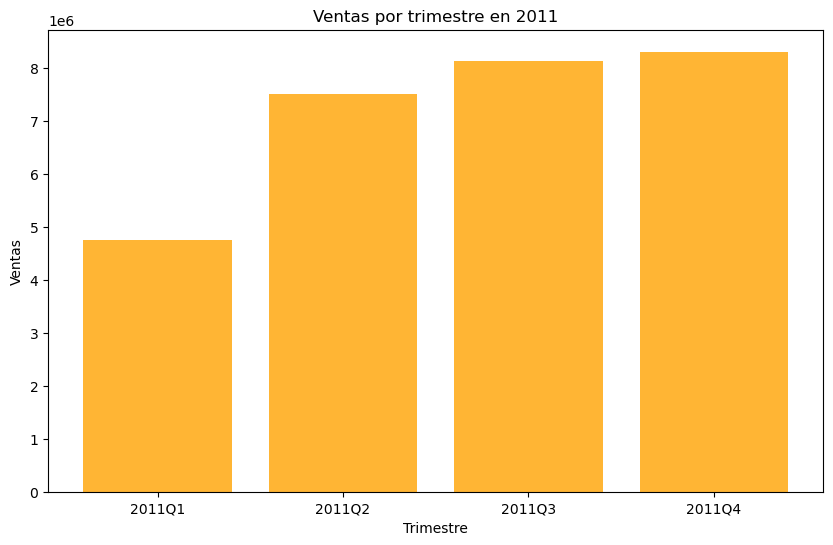

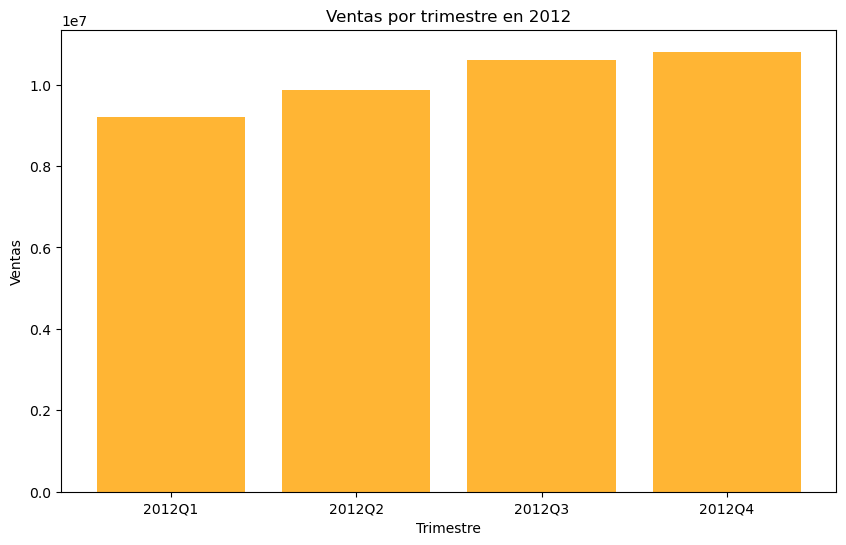

In [51]:
years = df.index.year.unique()

for year in years:
    df_year = df[df.index.year == year]
    sales_per_quarter = df_year.resample('Q')['total_sales'].sum()

    sales_per_quarter.index = sales_per_quarter.index.to_period('Q')

    plt.figure(figsize=(10,6))
    plt.bar(sales_per_quarter.index.astype(str), sales_per_quarter.values, color="#ffb534")
    plt.xlabel('Trimestre')
    plt.ylabel('Ventas')
    plt.title(f'Ventas por trimestre en {year}')
    plt.show()

Comprobamos la distribución por mes

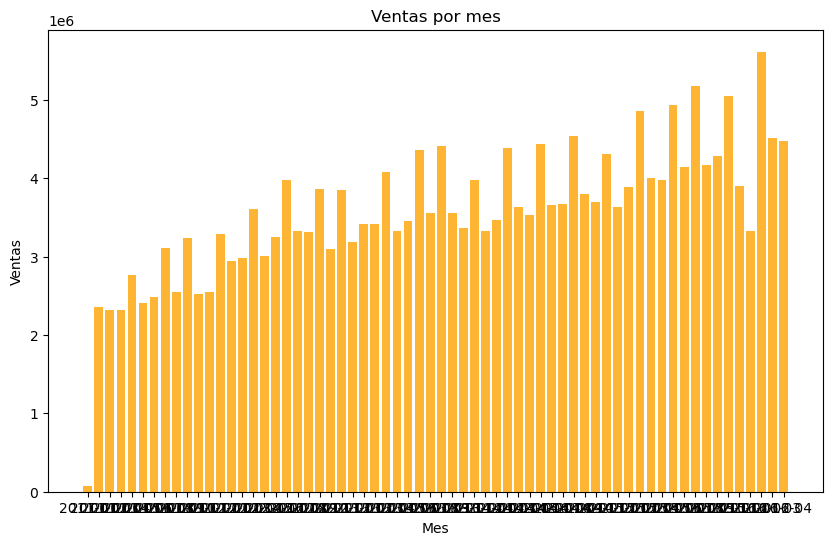

In [52]:
sales_per_month = df.resample('M')['total_sales'].sum()
sales_per_month.index = sales_per_month.index.to_period('M')

plt.figure(figsize=(10,6))
plt.bar(sales_per_month.index.astype(str), sales_per_month.values, color="#ffb534")
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Ventas por mes')
plt.show()

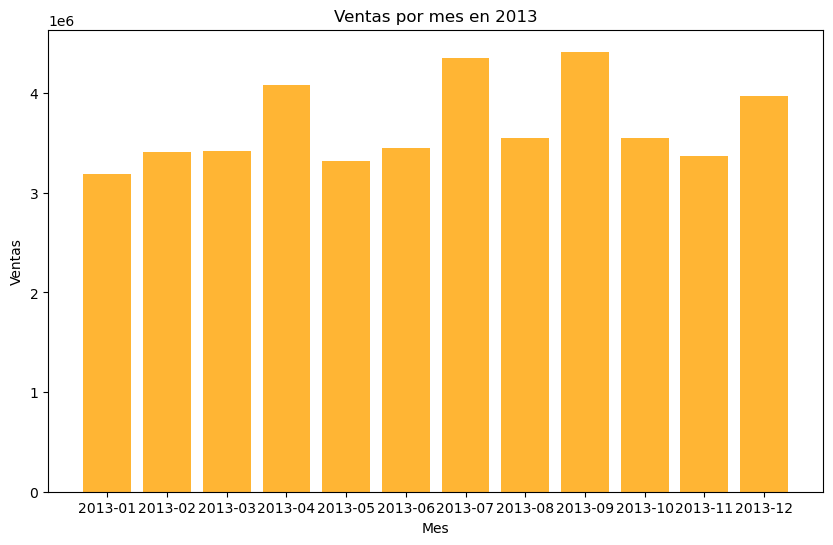

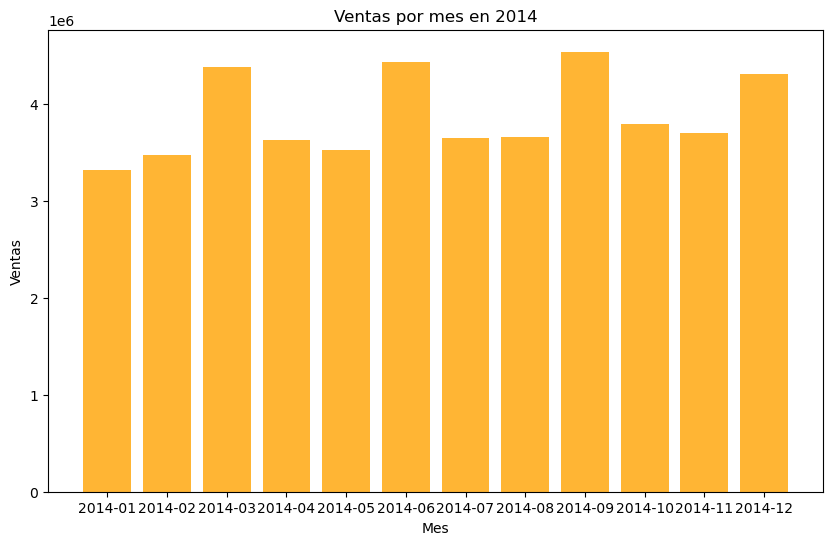

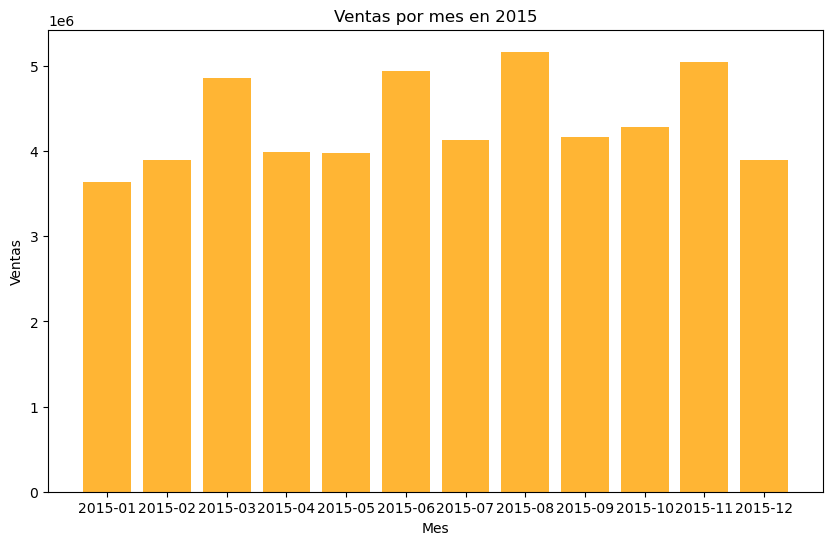

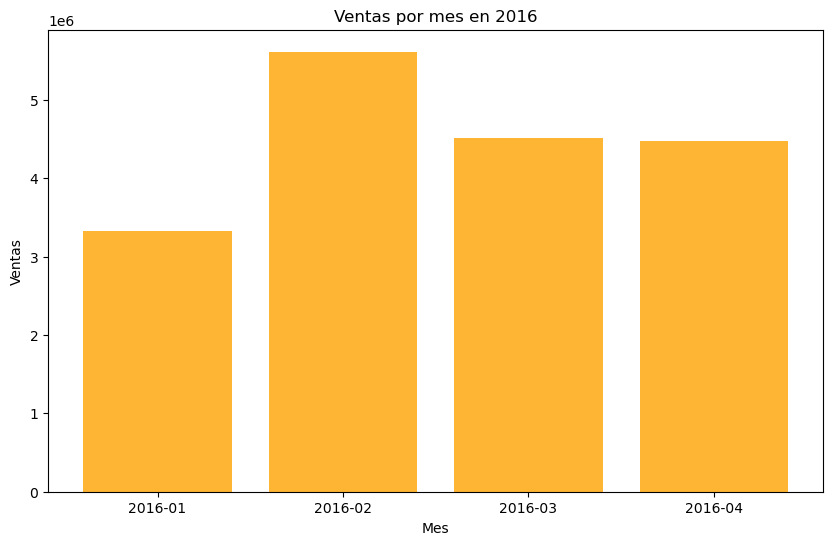

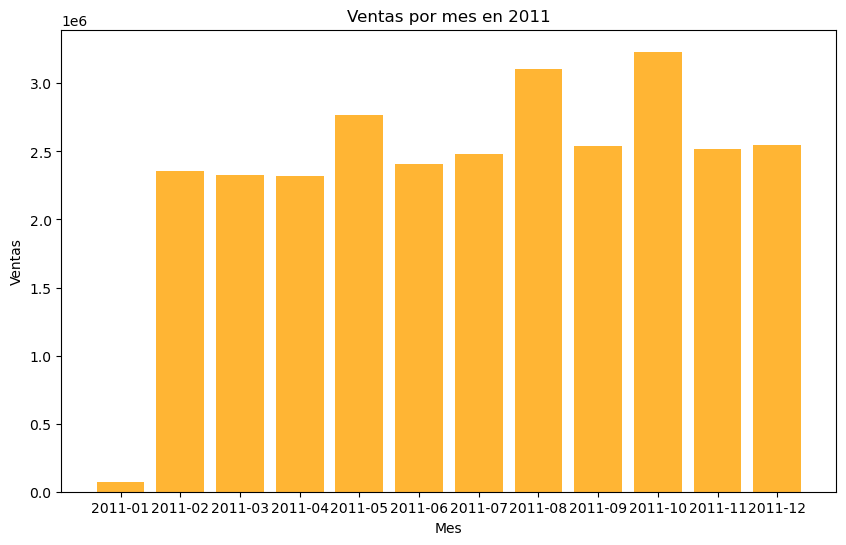

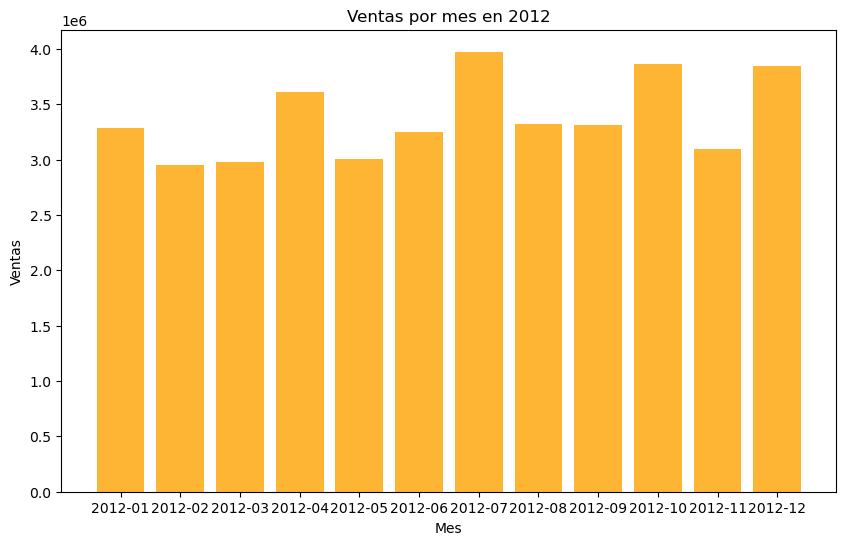

In [53]:
def plot_sales_per_month(df):
    
    years = df.index.year.unique()

    for year in years:
        df_year = df[df.index.year == year]
        
        sales_per_month = df_year.resample('M')['total_sales'].sum()
        sales_per_month.index = sales_per_month.index.to_period('M')

        plt.figure(figsize=(10,6))
        plt.bar(sales_per_month.index.astype(str), sales_per_month.values, color="#ffb534")
        plt.xlabel('Mes')
        plt.ylabel('Ventas')
        plt.title(f'Ventas por mes en {year}')
        plt.show()

plot_sales_per_month(df)

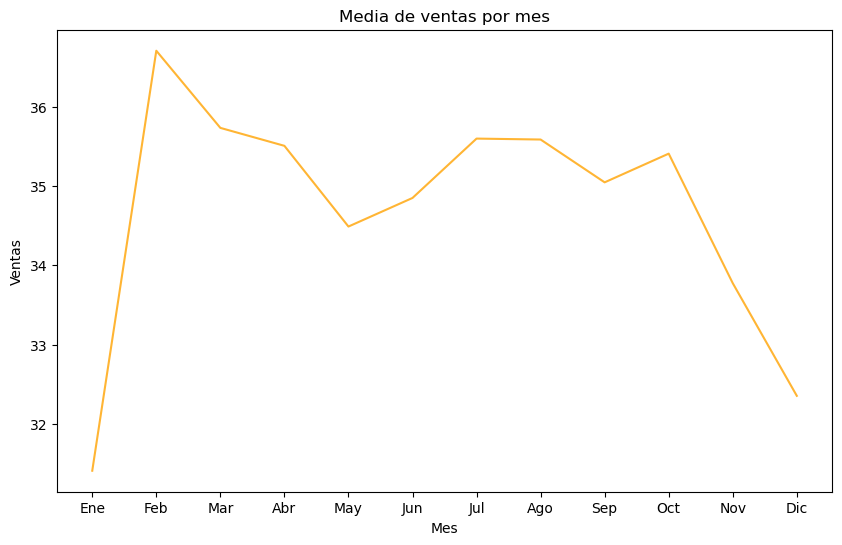

In [54]:
sales_per_month = df.groupby(df.index.month)['total_sales'].mean()

months = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

plt.figure(figsize=(10,6))
plt.plot(months, sales_per_month.values, color="#ffb534")
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Media de ventas por mes')
plt.show()

In [55]:
sales_per_month_sum = df.groupby(df.index.month)['total_sales'].sum()
sales_per_month_mean = df.groupby(df.index.month)['total_sales'].mean()
sales_per_month_mode = df.groupby(df.index.month)['total_sales'].apply(lambda x: x.mode()[0])

print("Suma de ventas por mes:")
for month, total in zip(months, sales_per_month_sum):
    print(f"{month}: {total}")

print("\nMedia de ventas por mes:")
for month, mean in zip(months, sales_per_month_mean):
    print(f"{month}: {mean}")

print("\nModa de ventas por mes:")
for month, mode in zip(months, sales_per_month_mode):
    print(f"{month}: {mode}")

Suma de ventas por mes:
Ene: 16830338.7219
Feb: 21687288.6522
Mar: 22484969.941800002
Abr: 22109031.4711
May: 16599900.6201
Jun: 18482715.894700002
Jul: 18593845.5671
Ago: 18815447.6757
Sep: 18980640.05
Oct: 18719887.587700002
Nov: 17726623.3735
Dic: 18577959.3788

Media de ventas por mes:
Ene: 31.408499573390465
Feb: 36.70796954025518
Mar: 35.734387447733326
Abr: 35.50790325736247
May: 34.48950166547892
Jun: 34.85023181935601
Jul: 35.59925248817752
Ago: 35.587463213671015
Sep: 35.047242107712165
Oct: 35.40933319153122
Nov: 33.774839855234006
Dic: 32.353551669142504

Moda de ventas por mes:
Ene: 0.0
Feb: 0.0
Mar: 0.0
Abr: 0.0
May: 0.0
Jun: 0.0
Jul: 0.0
Ago: 0.0
Sep: 0.0
Oct: 0.0
Nov: 0.0
Dic: 0.0


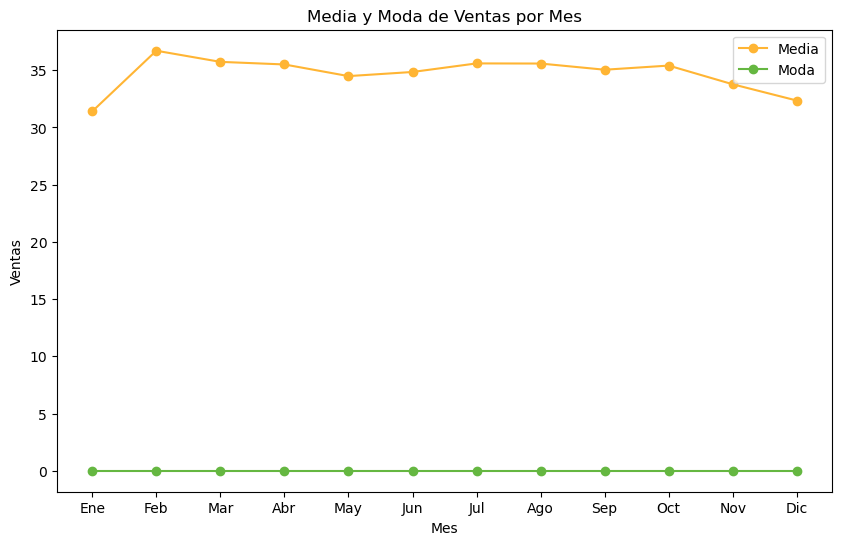

In [56]:
sales_per_month_mean = df.groupby(df.index.month)['total_sales'].mean()
sales_per_month_mode = df.groupby(df.index.month)['total_sales'].apply(lambda x: x.mode()[0])

plt.figure(figsize=(10,6))

plt.plot(months, sales_per_month_mean, marker='o', label='Media', color="#ffb534")
plt.plot(months, sales_per_month_mode, marker='o', label='Moda', color="#65b741")

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Media y Moda de Ventas por Mes')
plt.legend()
plt.show()

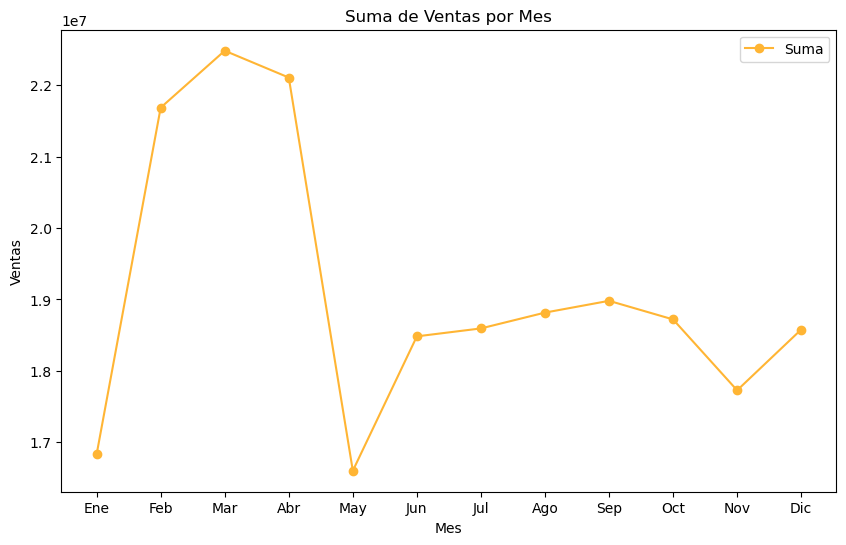

In [57]:
sales_per_month_sum = df.groupby(df.index.month)['total_sales'].sum()

plt.figure(figsize=(10,6))

plt.plot(months, sales_per_month_sum, marker='o', label='Suma', color="#ffb534")

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Suma de Ventas por Mes')
plt.legend()
plt.show()

Filtramos el DataFrame para excluir el año 2016

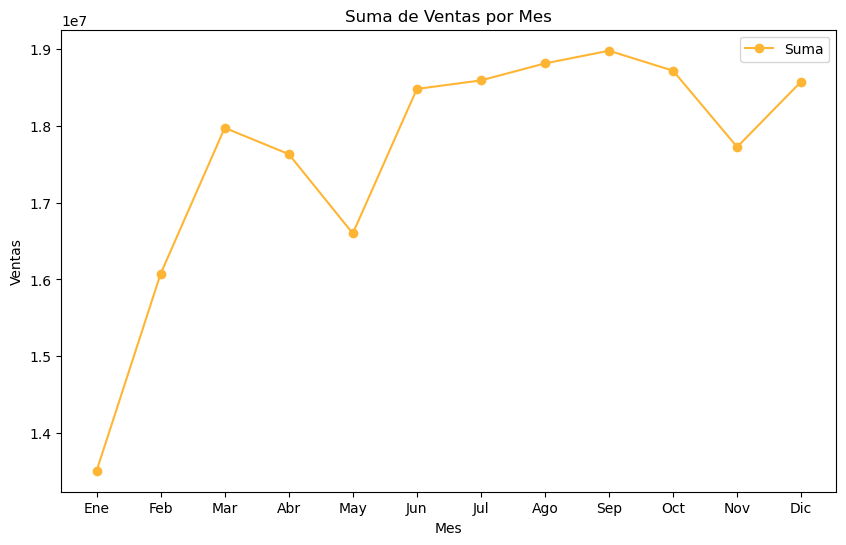

In [58]:
df_filtered = df[df.index.year != 2016]

sales_per_month_sum = df_filtered.groupby(df_filtered.index.month)['total_sales'].sum()

plt.figure(figsize=(10,6))

plt.plot(months, sales_per_month_sum, marker='o', label='Suma', color="#ffb534")

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Suma de Ventas por Mes')
plt.legend()
plt.show()

#### Holidays

In [4]:
total_sales = df.groupby('is_holidays')['total_sales'].sum()
print(total_sales)

is_holidays
0    1.735888e+08
1    5.601987e+07
Name: total_sales, dtype: float64


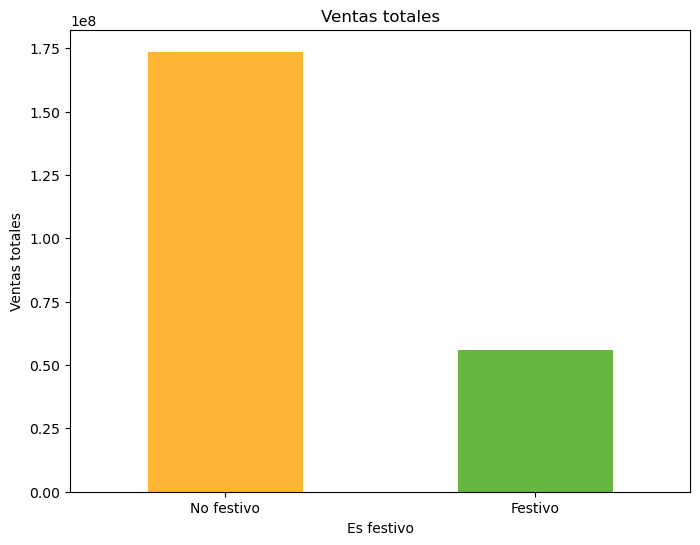

In [13]:
total_sales = df.groupby('is_holidays')['total_sales'].sum()

total_sales.plot(kind='bar', figsize=(8,6), color=["#ffb534", "#65b741"])
plt.xlabel('Es festivo')
plt.ylabel('Ventas totales')
plt.title('Ventas totales')
plt.xticks([0,1], ['No festivo', 'Festivo'], rotation=0)
plt.show()

In [19]:
mean_sales = df.groupby('is_holidays')['total_sales'].mean()
print(mean_sales)

is_holidays
0    35.179715
1    33.421351
Name: total_sales, dtype: float64


No vemos una correlación, los dias festivos no hay más ventas.

#### Units sold

In [36]:
correlacion = df['units_sold'].corr(df['total_sales'])
print(f'La correlación entre units_sold y total_sales es {correlacion}')

La correlación entre units_sold y total_sales es 0.7080385186073971


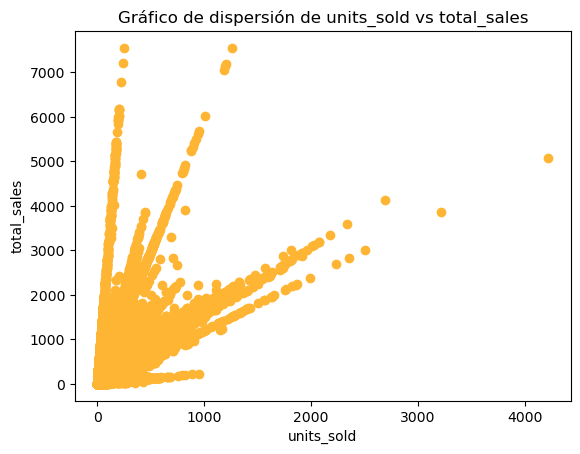

In [37]:
plt.scatter(df['units_sold'], df['total_sales'], color="#ffb534" )
plt.xlabel('units_sold')
plt.ylabel('total_sales')
plt.title('Gráfico de dispersión de units_sold vs total_sales')
plt.show()

#### Sell prices

In [32]:
correlacion = df['sell_price'].corr(df['total_sales'])
print(f'La correlación entre sell_price y total_sales es {correlacion}')

La correlación entre sell_price y total_sales es 0.10570773947994991


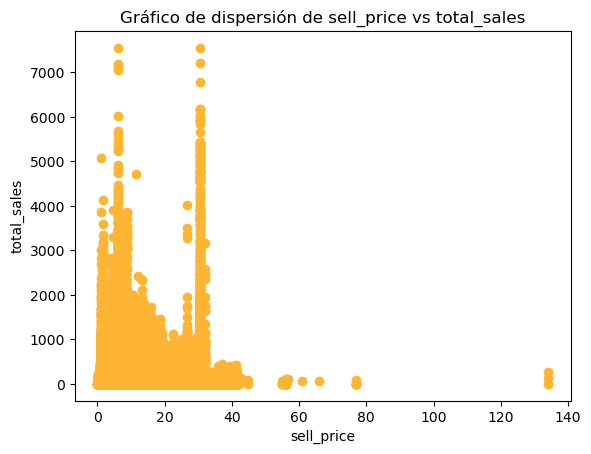

In [34]:
plt.scatter(df['sell_price'], df['total_sales'], color="#ffb534")
plt.xlabel('sell_price')
plt.ylabel('total_sales')
plt.title('Gráfico de dispersión de sell_price vs total_sales')
plt.show()

#### Items

In [39]:
ventas_por_item = df.groupby('item')['total_sales'].sum()
print(ventas_por_item)

item
ACCESORIES_1_001      44563.8844
ACCESORIES_1_002      26644.7146
ACCESORIES_1_003       5533.7310
ACCESORIES_1_004     234221.1662
ACCESORIES_1_005      55318.0383
                        ...     
SUPERMARKET_3_823     50550.0120
SUPERMARKET_3_824     25376.9400
SUPERMARKET_3_825     65517.8520
SUPERMARKET_3_826     18616.8480
SUPERMARKET_3_827     13456.8000
Name: total_sales, Length: 3049, dtype: float64


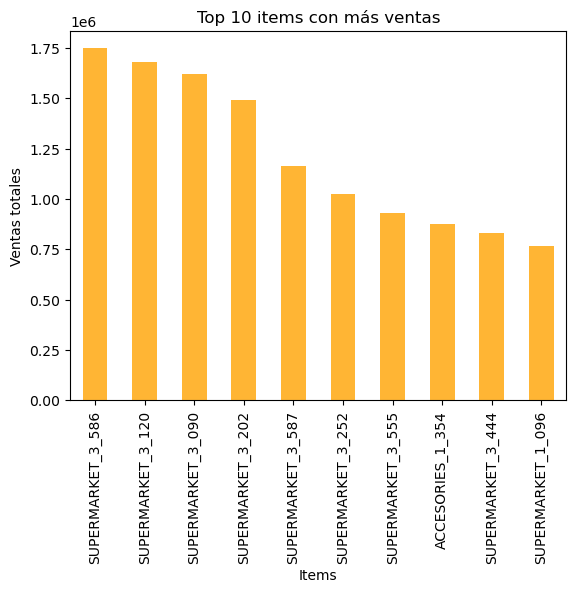

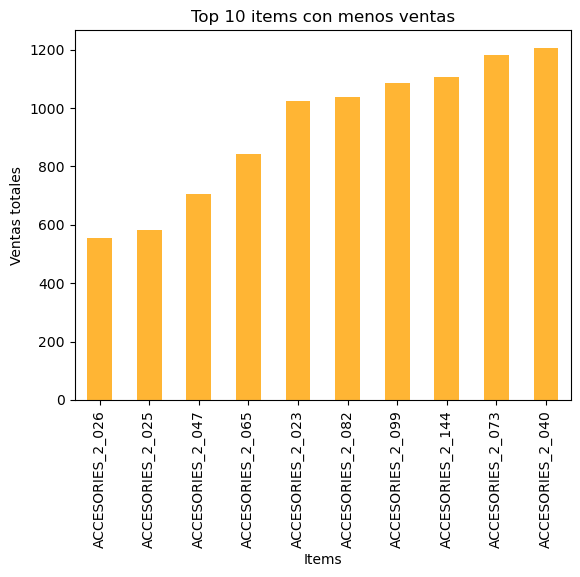

In [42]:
top_10_items = ventas_por_item.nlargest(10)
bottom_10_items = ventas_por_item.nsmallest(10)

top_10_items.plot(kind='bar', color="#ffb534")
plt.xlabel('Items')
plt.ylabel('Ventas totales')
plt.title('Top 10 items con más ventas')
plt.show()

bottom_10_items.plot(kind='bar', color="#ffb534")
plt.xlabel('Items')
plt.ylabel('Ventas totales')
plt.title('Top 10 items con menos ventas')
plt.show()

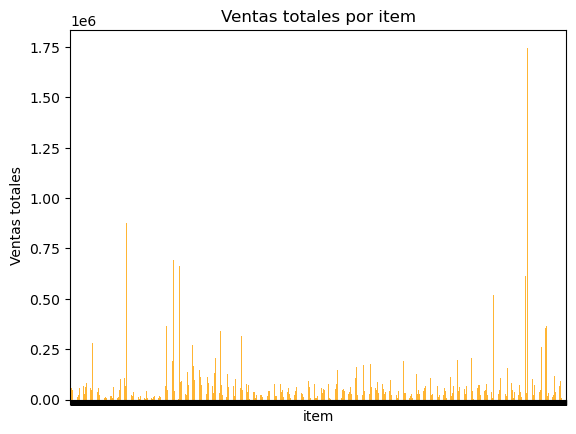

In [46]:
ventas_por_item.plot(kind='bar', color="#ffb534")
plt.ylabel('Ventas totales')
plt.title('Ventas totales por item')
plt.xticks(visible=False)
plt.show()

#### Category

In [44]:
ventas_por_categoria = df.groupby('category')['total_sales'].sum()
print(ventas_por_categoria)

category
ACCESORIES       3.013996e+07
HOME_&_GARDEN    6.950307e+07
SUPERMARKET      1.299656e+08
Name: total_sales, dtype: float64


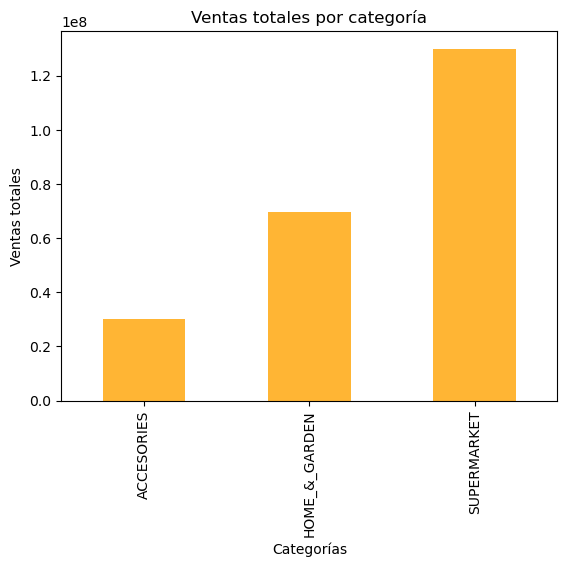

In [45]:
ventas_por_categoria.plot(kind='bar', color="#ffb534")
plt.xlabel('Categorías')
plt.ylabel('Ventas totales')
plt.title('Ventas totales por categoría')
plt.show()

#### Departments

In [47]:
ventas_por_departamento = df.groupby('department')['total_sales'].sum()
print(ventas_por_departamento)

department
ACCESORIES_1       2.858692e+07
ACCESORIES_2       1.553035e+06
HOME_&_GARDEN_1    5.124741e+07
HOME_&_GARDEN_2    1.825565e+07
SUPERMARKET_1      1.541994e+07
SUPERMARKET_2      2.981893e+07
SUPERMARKET_3      8.472675e+07
Name: total_sales, dtype: float64


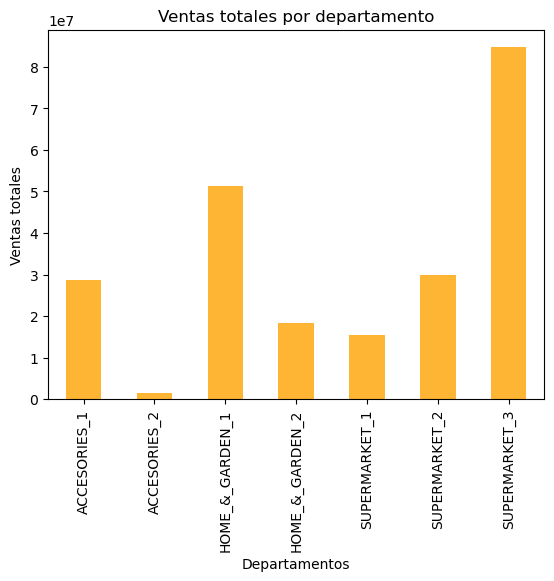

In [48]:
ventas_por_departamento.plot(kind='bar', color="#ffb534")
plt.xlabel('Departamentos')
plt.ylabel('Ventas totales')
plt.title('Ventas totales por departamento')
plt.show()

#### Stores

In [49]:
ventas_por_tienda = df.groupby('stores')['total_sales'].sum()
print(ventas_por_tienda)

stores
Back_Bay(BOS_3)             2.181127e+07
Brooklyn(NYC_4)             1.495885e+07
Greenwich_Village(NYC_1)    2.757273e+07
Harlem(NYC_2)               2.135534e+07
Midtown_Village(PHI_1)      1.811085e+07
Queen_Village(PHI_3)        2.063028e+07
Roxbury(BOS_2)              2.512650e+07
South_End(BOS_1)            1.923361e+07
Tribeca(NYC_3)              3.928694e+07
Yorktown(PHI_2)             2.152227e+07
Name: total_sales, dtype: float64


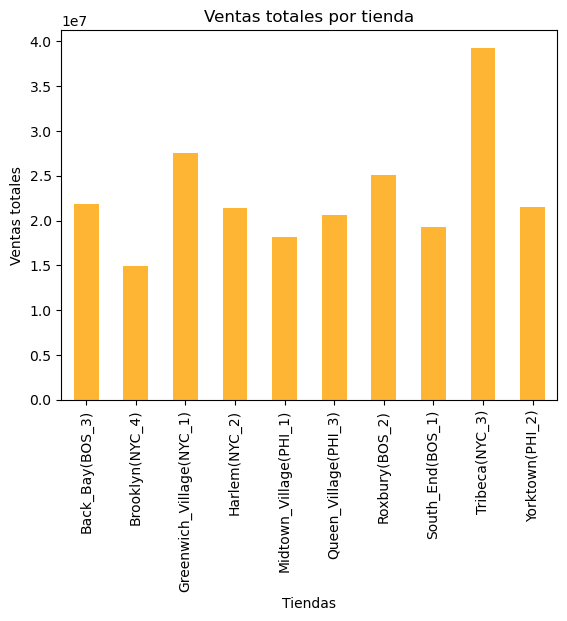

In [50]:
ventas_por_tienda.plot(kind='bar',color="#ffb534" )
plt.xlabel('Tiendas')
plt.ylabel('Ventas totales')
plt.title('Ventas totales por tienda')
plt.show()

#### Region

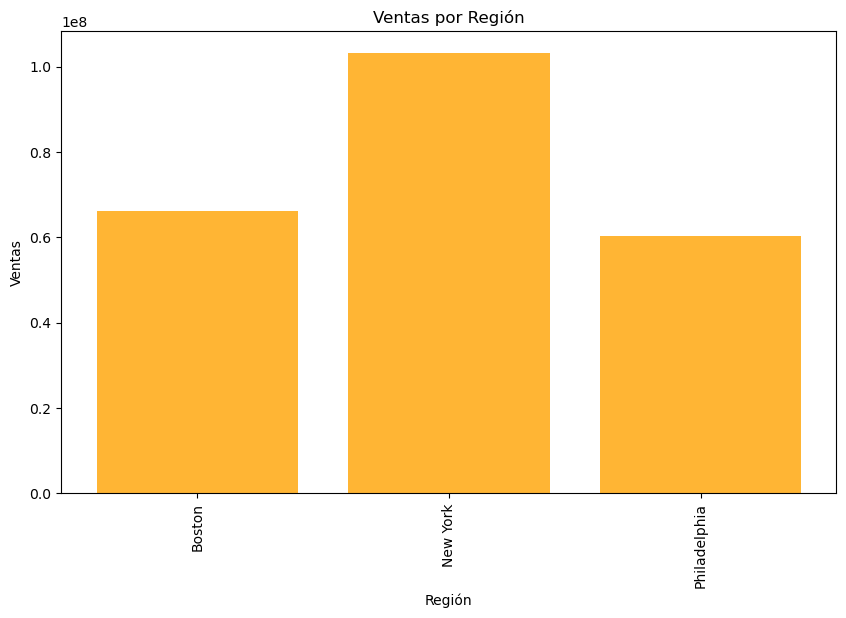

In [20]:
sales_per_region = df.groupby('region')['total_sales'].sum()

plt.figure(figsize=(10,6))

plt.bar(sales_per_region.index, sales_per_region.values,  color= "#ffb534")
plt.xlabel('Región')
plt.ylabel('Ventas')
plt.title('Ventas por Región')
plt.xticks(rotation=90)  
plt.show()

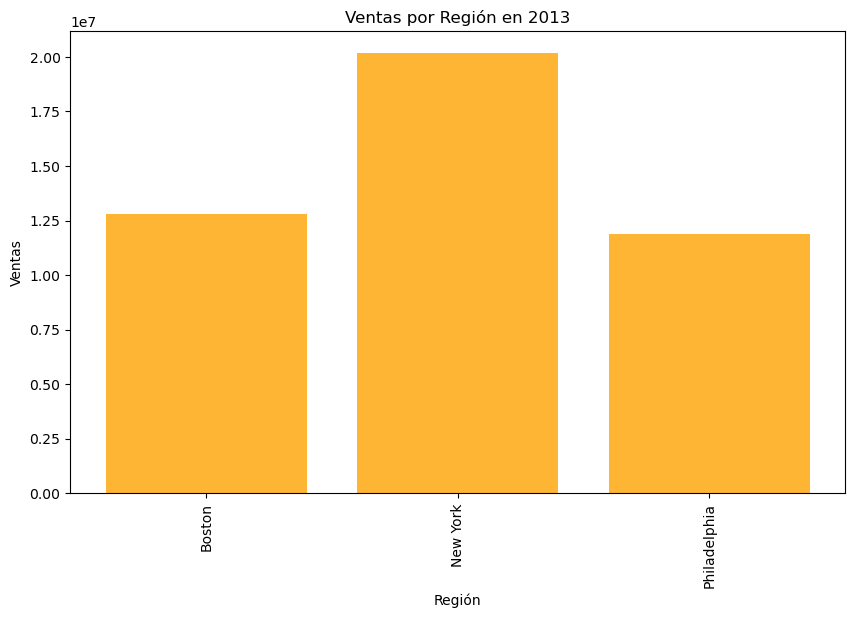

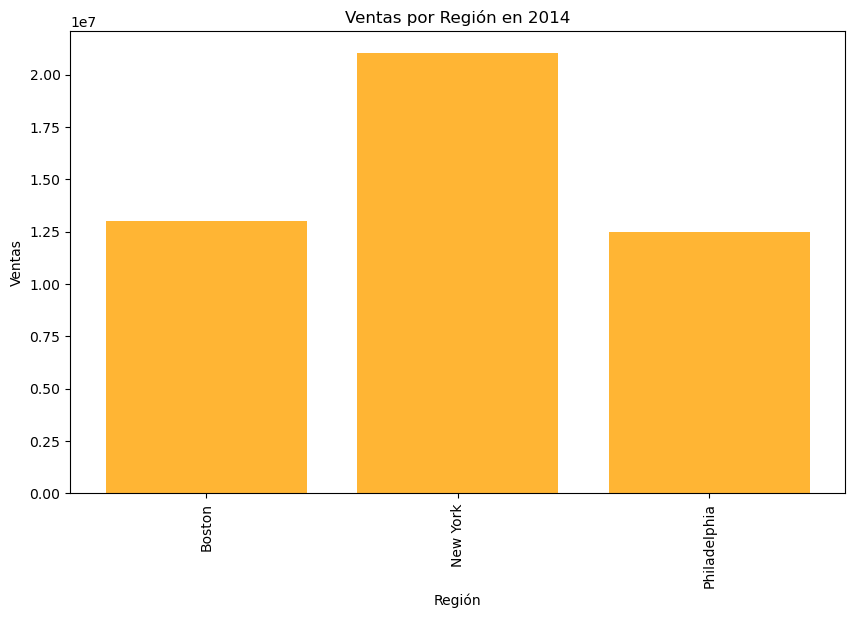

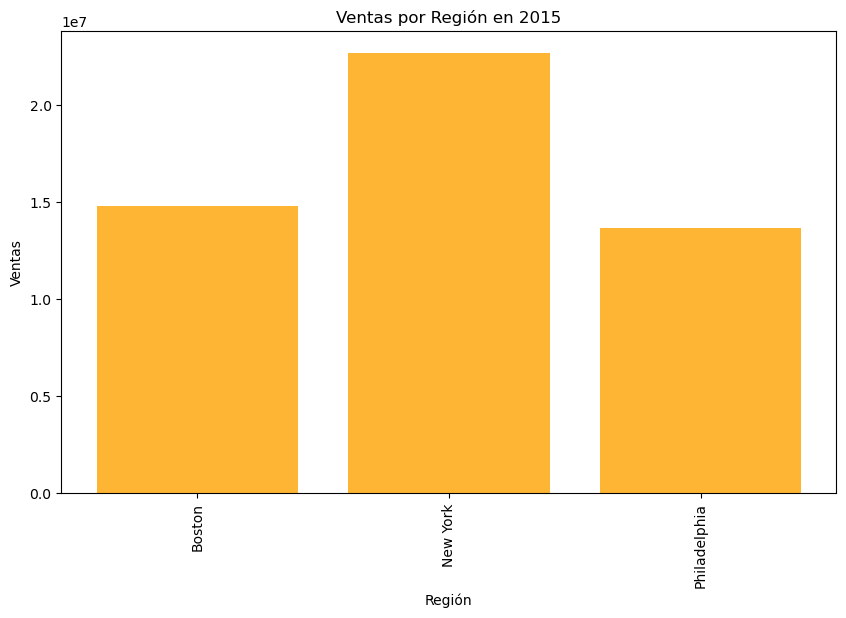

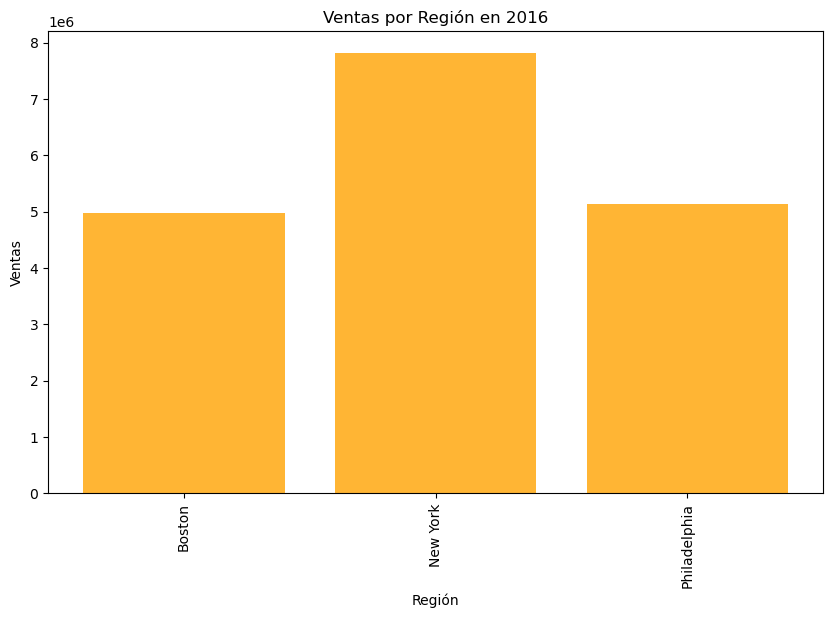

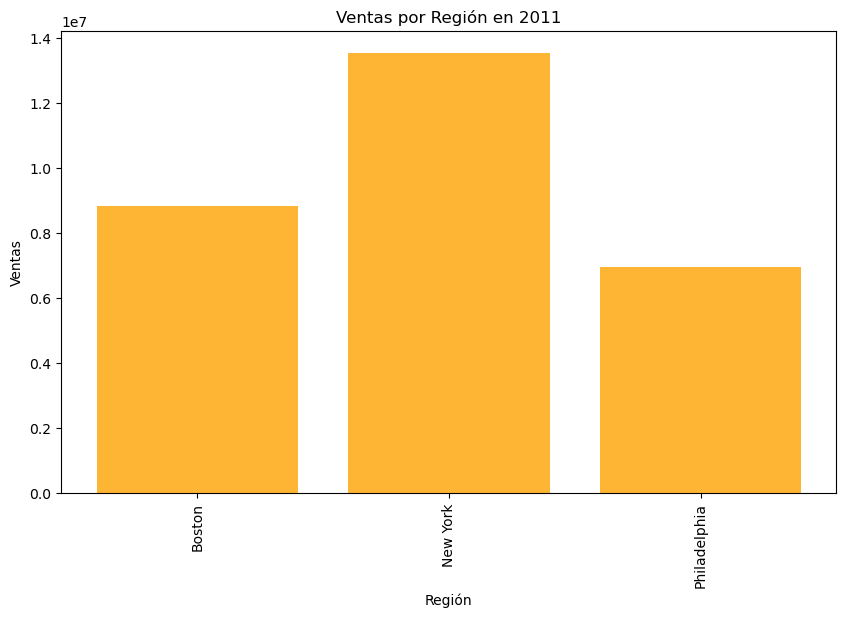

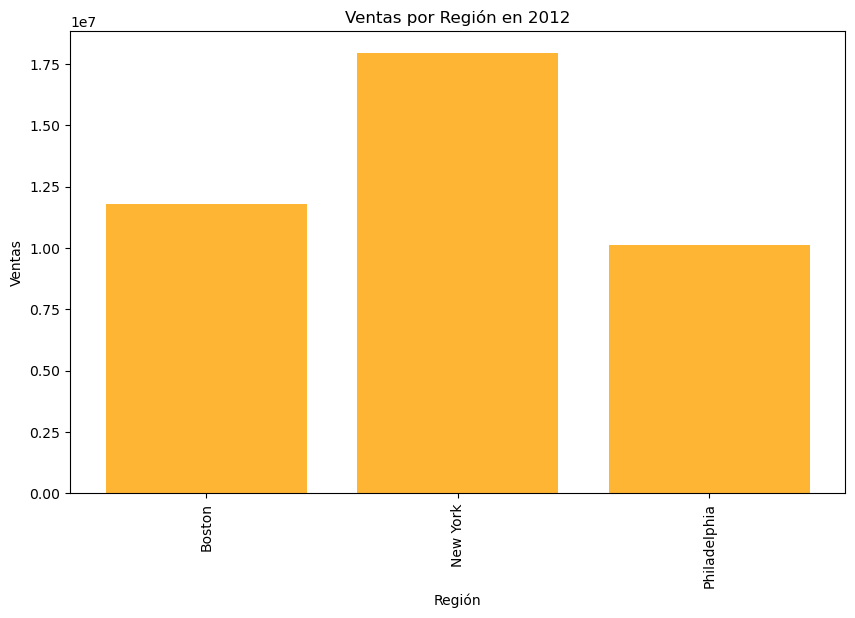

In [23]:
years = df['year'].unique()

for year in years:
    df_year = df[df['year'] == year]
    
    sales_per_region = df_year.groupby('region')['total_sales'].sum()

    plt.figure(figsize=(10,6))

    plt.bar(sales_per_region.index, sales_per_region.values,  color= "#ffb534")
    plt.xlabel('Región')
    plt.ylabel('Ventas')
    plt.title(f'Ventas por Región en {year}')
    plt.xticks(rotation=90)  
    plt.show()

### Relaciones entre variables

Comprobamos entras relaciones entre variables, el primer caso vemos las vacaciones a lo largo de los años

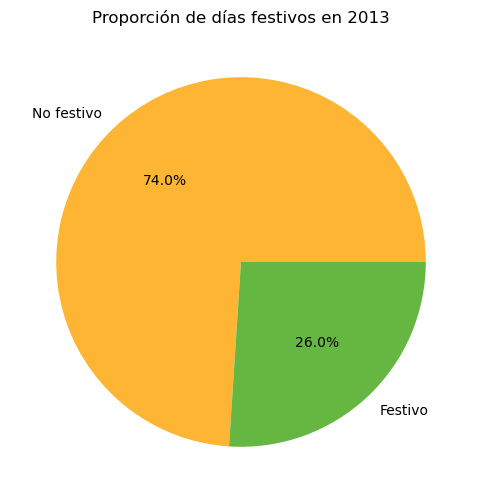

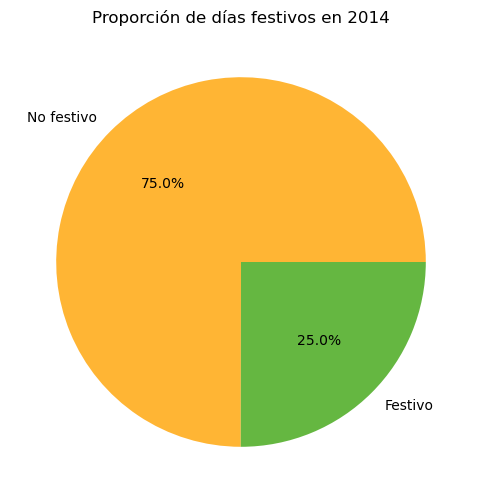

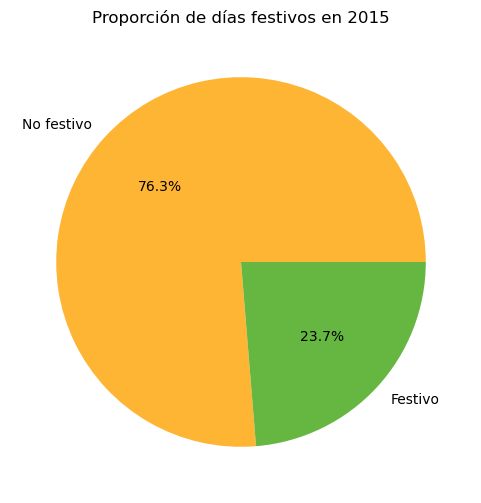

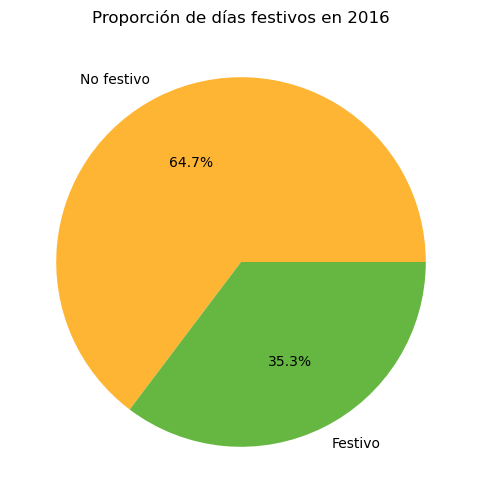

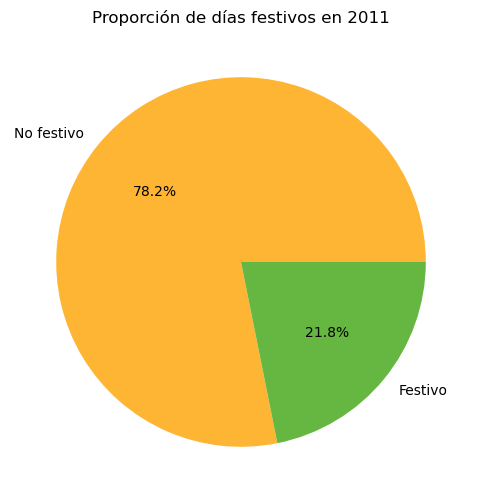

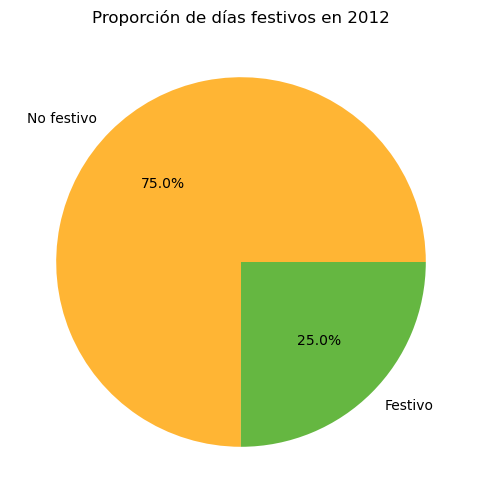

In [59]:
holiday_counts = df.groupby('year')['is_holidays'].value_counts()

years = df['year'].unique()

for year in years:
    if year in holiday_counts.index:
        plt.figure(figsize=(6,6))
        plt.pie(holiday_counts[year], labels=['No festivo', 'Festivo'], autopct='%1.1f%%', colors=["#ffb534", "#65b741"])
        plt.title(f'Proporción de días festivos en {year}')
        plt.show()
    else:
        print(f'No hay datos para el año {year}')

También vemos si varian las categorías más vendidas a lo largo de los años

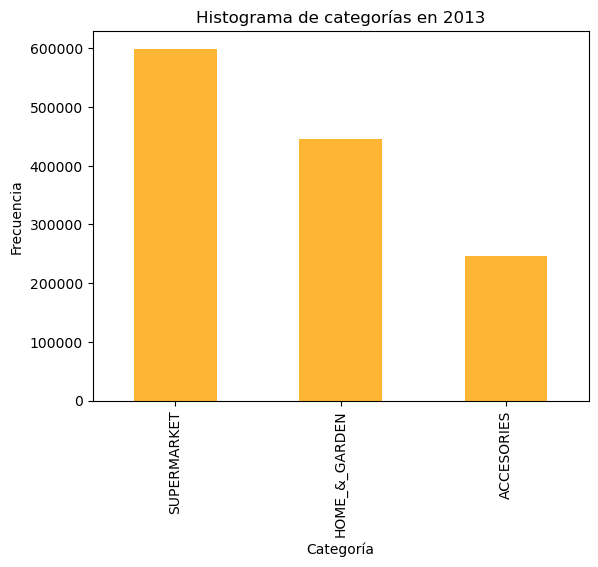

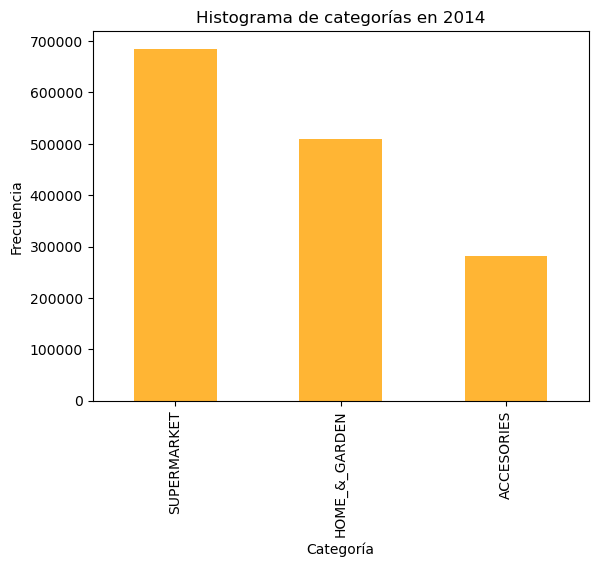

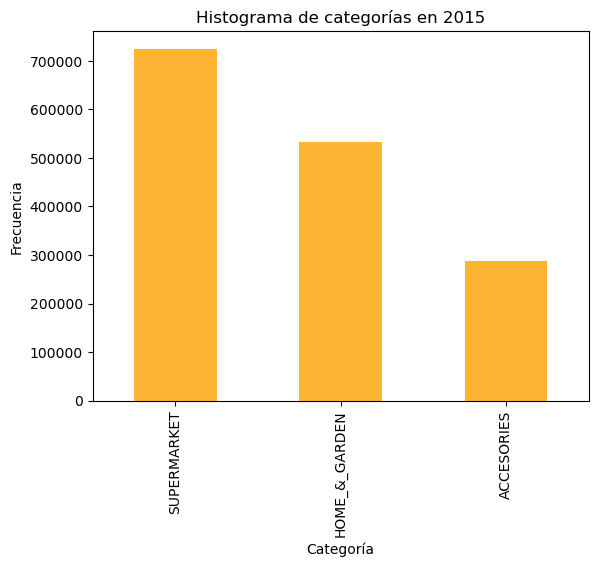

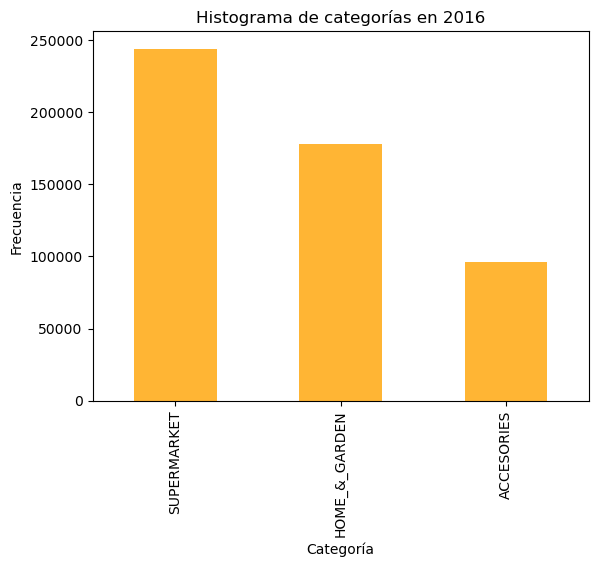

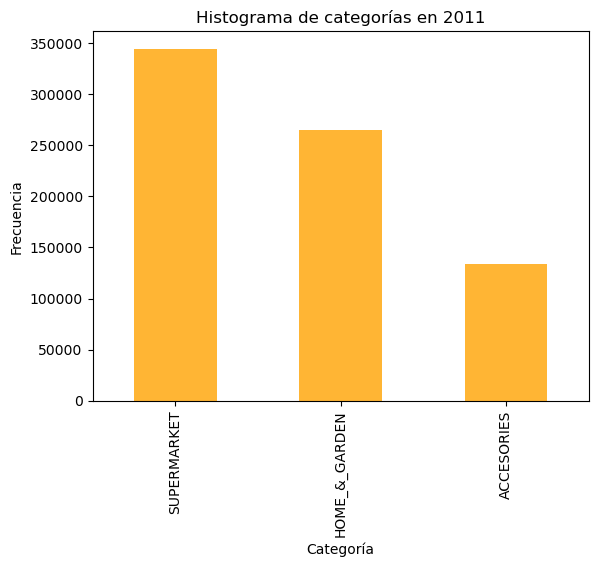

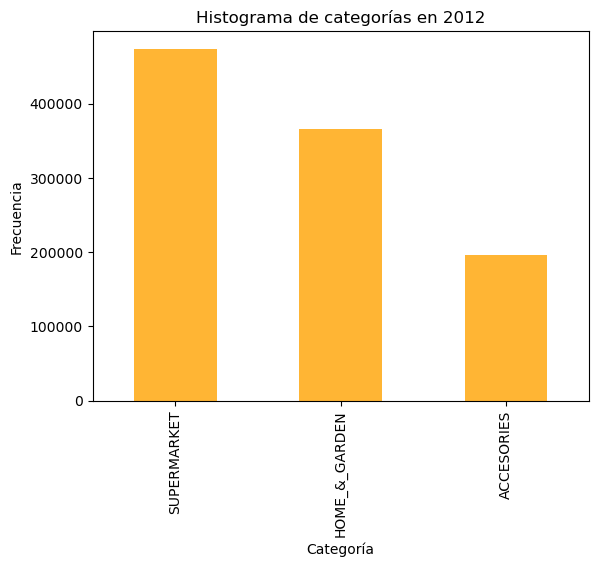

In [9]:
years = df['year'].unique()

for year in years:
    df_year = df[df['year'] == year]
    
    df_year['category'].value_counts().plot(kind='bar',color= "#ffb534")
    
    plt.title(f'Histograma de categorías en {year}')
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia')
    
    plt.show()

Vemos lo mismo, pero ahota  por departamentos

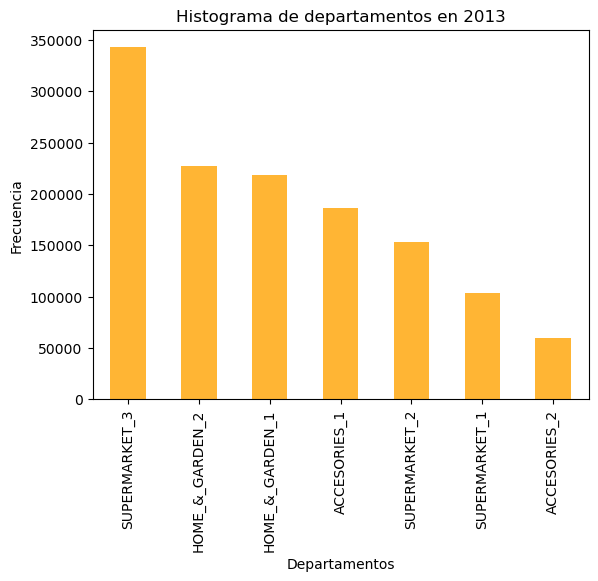

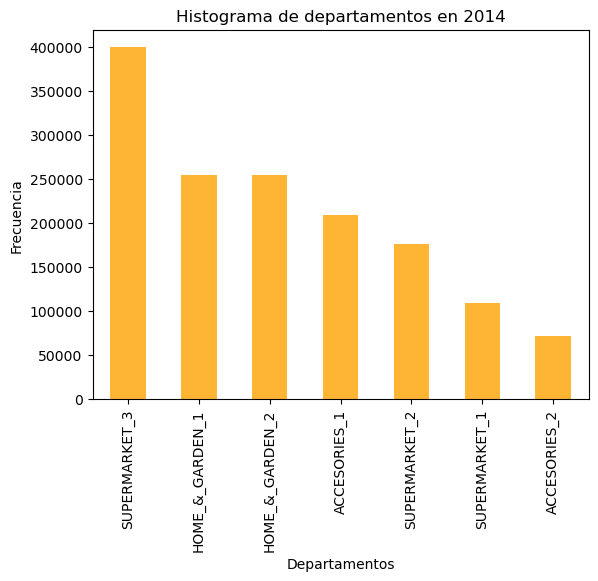

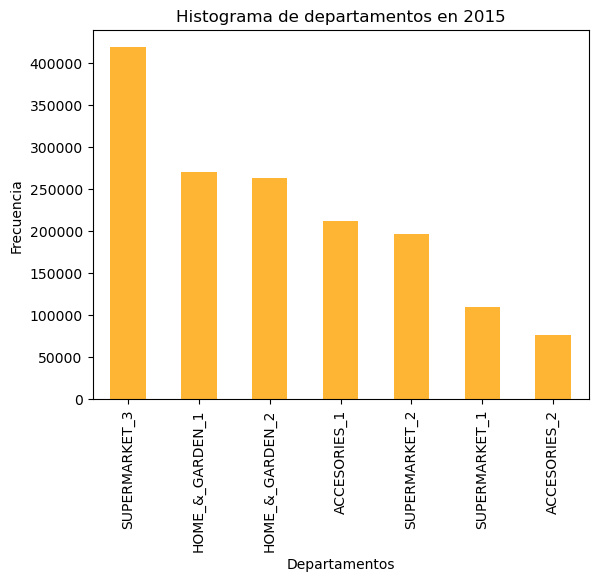

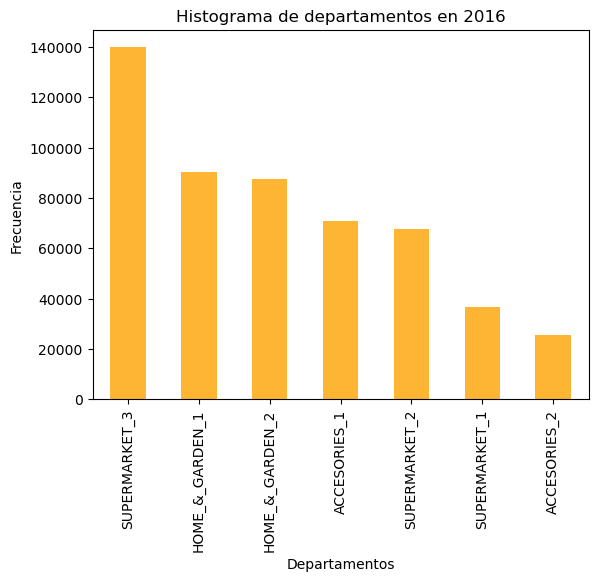

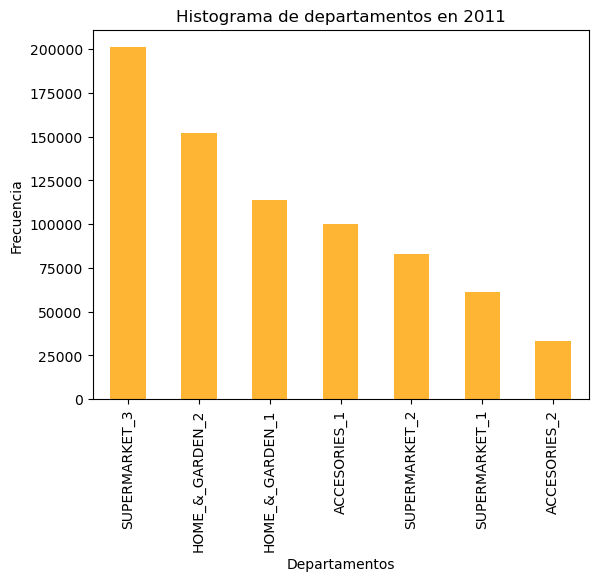

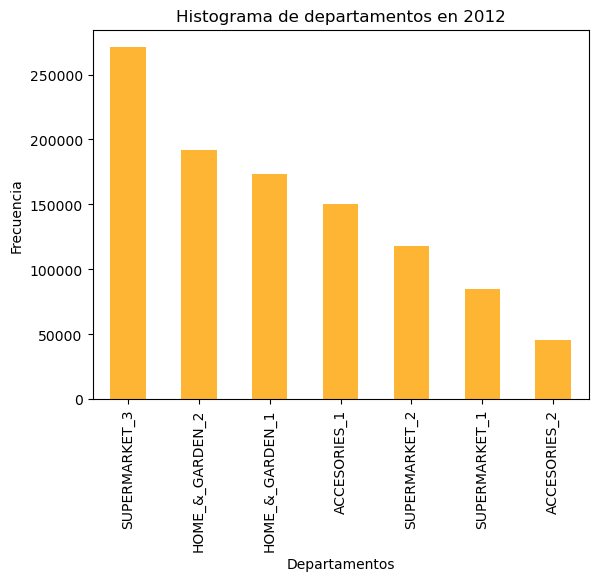

In [16]:
for year in years:
    df_year = df[df['year'] == year]
    
    df_year['department'].value_counts().plot(kind='bar', color= "#ffb534")
    
    plt.title(f'Histograma de departamentos en {year}')
    plt.xlabel('Departamentos')
    plt.ylabel('Frecuencia')
    
    plt.show()

In [7]:
precio_promedio_por_categoria = df.groupby('category')['sell_price'].mean()
print("Precio promedio de venta por categoría:\n", precio_promedio_por_categoria)

Precio promedio de venta por categoría:
 category
ACCESORIES       7.086660
HOME_&_GARDEN    6.831545
SUPERMARKET      3.896713
Name: sell_price, dtype: float64


Agrupamos los productos por precio de estos

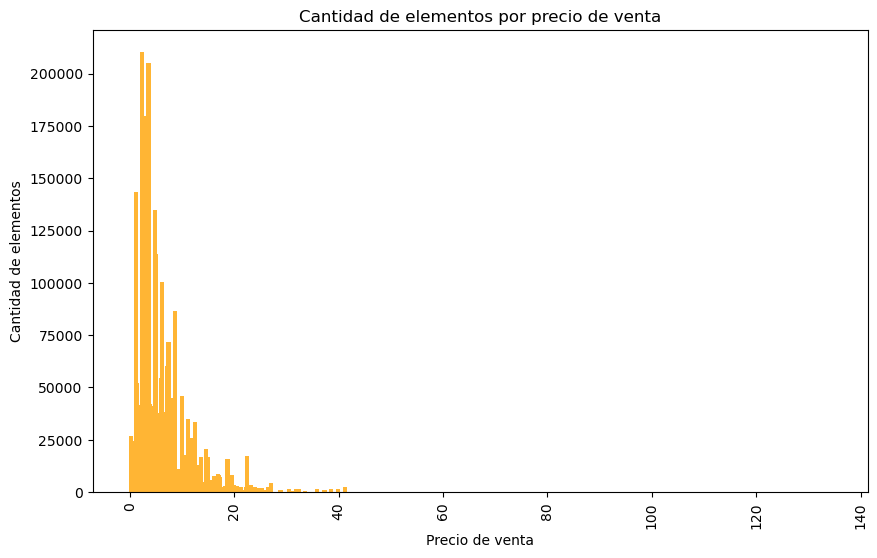

In [51]:
items_per_price = df.groupby('sell_price')['item'].count()

plt.figure(figsize=(10,6))

plt.bar(items_per_price.index, items_per_price.values, color="#ffb534")
plt.xlabel('Precio de venta')
plt.ylabel('Cantidad de elementos')
plt.title('Cantidad de elementos por precio de venta')
plt.xticks(rotation=90)  
plt.show()

Vemos los productos más vendidos por region

In [54]:
def plot_top10_items_by_region(df):
    df_grouped = df.groupby(['region', 'item']).sum('total_sales').reset_index()

    regions = df['region'].unique()

    for region in regions:
        df_region = df_grouped[df_grouped['region'] == region]

        df_top10 = df_region.nlargest(10, 'total_sales')

        fig = px.bar(df_top10, x='item', y='total_sales', title=f'Top 10 productos en {region}', color_discrete_sequence=["#ffb534"])
        fig.show()

plot_top10_items_by_region(df)

In [55]:
def plot_top10_items_by_region(df):
    df_grouped = df.groupby(['region', 'item']).sum('total_sales').reset_index()

    regions = df['region'].unique()

    for region in regions:
        df_region = df_grouped[df_grouped['region'] == region]

    
        df_top10 = df_region.nlargest(10, 'total_sales')

        fig = px.bar(df_top10, x='item', y='total_sales', title=f'Top 10 productos en {region}', color_discrete_sequence=["#ffb534"])
        fig.show()

plot_top10_items_by_region(df)

Supermarket siempre prevalece

In [56]:
def plot_top10_items_by_region(df):
    df_grouped = df.groupby(['region', 'item']).sum('total_sales').reset_index()

    regions = df['region'].unique()

    for region in regions:
        df_region = df_grouped[df_grouped['region'] == region]

        df_top10 = df_region.nlargest(10, 'units_sold')

        fig = px.bar(df_top10, x='item', y='units_sold', title=f'Top 10 productos vendidos en {region}', color_discrete_sequence=["#ffb534"])
        fig.show()

plot_top10_items_by_region(df)

In [57]:
def plot_top10_items_by_region(df):
    df_grouped = df.groupby(['region', 'category']).sum('total_sales').reset_index()

    regions = df['region'].unique()

    for region in regions:
        df_region = df_grouped[df_grouped['region'] == region]

        df_top10 = df_region.nlargest(3, 'total_sales')

        fig = px.bar(df_top10, x='category', y='total_sales', title=f'Top 3 categorias en {region}', color_discrete_sequence=["#ffb534"])
        fig.show()

plot_top10_items_by_region(df)